In [ ]:
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np


In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/drive/MyDrive/catdog')

FileNotFoundError: ignored

In [ ]:
os.listdir('cats')

In [ ]:
os.listdir()

['dogs', 'cats']

In [ ]:
img = plt.imread("/content/drive/MyDrive/cats/Abyssinian_1.jpg")
res = cv2.resize(img , dsize = (120,120) , interpolation = cv2.INTER_CUBIC)

In [ ]:
img

In [ ]:
res.shape

In [ ]:
res1 = res.flatten()
res1



In [ ]:
img.tolist()

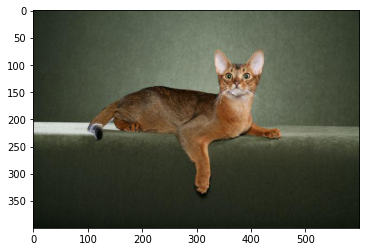

In [ ]:
plt.imshow(img)

In [ ]:
List1 = []
List2 = []
c=0
for folder in os.listdir():
  
  for path in os.listdir(folder):
    img = plt.imread(folder+ '/' + path)
    res = cv2.resize(img , dsize = (50,50) , interpolation = cv2.INTER_CUBIC).flatten()/255
    List1.append(res)
    List2.append(c)
  c=1
  


In [ ]:
List1

In [ ]:
X = np.array(List1 , dtype = 'float') 
Y = np.array(List2 , dtype = 'bool')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X, Y,test_size = 0.2, random_state = 4)

In [ ]:
from sklearn import linear_model

In [ ]:
reg = linear_model.LogisticRegression(C = 100, penalty = 'l1' , solver = 'saga' , warm_start = True)

In [ ]:
reg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=100, penalty='l1', solver='saga', warm_start=True)

In [ ]:
y_predict = reg.predict(x_test)

In [ ]:
reg.score(x_test , y_test)

0.625422582826234

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

       False       0.68      0.82      0.74       975
        True       0.42      0.25      0.32       504

    accuracy                           0.63      1479
   macro avg       0.55      0.54      0.53      1479
weighted avg       0.59      0.63      0.60      1479



In [ ]:
param_grid = [{'penalty' : ['l1' , 'l2' , 'elasticnet' , 'none'] , 'C' : [1.5 ,  10.0 , 50.0 , 100.0 , 200.0] , 'solver' : ['newton-cg' , 'lbfgs' , 'liblinear' , 'sag' , 'saga'] , 'multi_class' : ['auto' , 'ovr' , 'multinomial'] , 'warm_start' : [True , False] }]

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV( reg , param_grid , cv =3 , scoring = 'accuracy', return_train_score= True , verbose = 10 )

In [ ]:
grid_search.fit(x_train , y_train)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
[CV 1/3; 1/600] START C=1.5, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True
[CV 1/3; 1/600] END C=1.5, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 1/600] START C=1.5, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True
[CV 2/3; 1/600] END C=1.5, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 1/600] START C=1.5, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True
[CV 3/3; 1/600] END C=1.5, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 2/600] START C=1.5, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=False
[CV 1/3; 2/600] END C=1.5, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[C

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 9/600] END C=1.5, multi_class=auto, penalty=l1, solver=saga, warm_start=True;, score=(train=0.821, test=0.651) total time= 1.0min
[CV 2/3; 9/600] START C=1.5, multi_class=auto, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 9/600] END C=1.5, multi_class=auto, penalty=l1, solver=saga, warm_start=True;, score=(train=0.818, test=0.642) total time= 1.0min
[CV 3/3; 9/600] START C=1.5, multi_class=auto, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 9/600] END C=1.5, multi_class=auto, penalty=l1, solver=saga, warm_start=True;, score=(train=0.814, test=0.644) total time= 1.0min
[CV 1/3; 10/600] START C=1.5, multi_class=auto, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 10/600] END C=1.5, multi_class=auto, penalty=l1, solver=saga, warm_start=False;, score=(train=0.821, test=0.651) total time= 1.0min
[CV 2/3; 10/600] START C=1.5, multi_class=auto, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 10/600] END C=1.5, multi_class=auto, penalty=l1, solver=saga, warm_start=False;, score=(train=0.818, test=0.642) total time= 1.0min
[CV 3/3; 10/600] START C=1.5, multi_class=auto, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 10/600] END C=1.5, multi_class=auto, penalty=l1, solver=saga, warm_start=False;, score=(train=0.814, test=0.644) total time= 1.0min
[CV 1/3; 11/600] START C=1.5, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True
[CV 1/3; 11/600] END C=1.5, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.997, test=0.567) total time=  21.3s
[CV 2/3; 11/600] START C=1.5, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True
[CV 2/3; 11/600] END C=1.5, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.997, test=0.587) total time=  21.0s
[CV 3/3; 11/600] START C=1.5, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True
[CV 3/3; 11/600] END C=1.5, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.997, test=0.567) total time=  22.2s
[CV 1/3; 12/600] START C=1.5, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=False
[CV 1/3; 12/600] END C=1.5, multi_class=auto, p

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 13/600] END C=1.5, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.896, test=0.604) total time=   2.6s
[CV 2/3; 13/600] START C=1.5, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 13/600] END C=1.5, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.866, test=0.604) total time=   2.6s
[CV 3/3; 13/600] START C=1.5, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 13/600] END C=1.5, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.861, test=0.595) total time=   2.6s
[CV 1/3; 14/600] START C=1.5, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 14/600] END C=1.5, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.896, test=0.604) total time=   2.6s
[CV 2/3; 14/600] START C=1.5, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 14/600] END C=1.5, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.866, test=0.604) total time=   2.5s
[CV 3/3; 14/600] START C=1.5, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 14/600] END C=1.5, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.861, test=0.595) total time=   2.6s
[CV 1/3; 15/600] START C=1.5, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True
[CV 1/3; 15/600] END C=1.5, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True;, score=(train=0.997, test=0.567) total time=  57.9s
[CV 2/3; 15/600] START C=1.5, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True
[CV 2/3; 15/600] END C=1.5, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True;, score=(train=0.997, test=0.587) total time= 1.1min
[CV 3/3; 15/600] START C=1.5, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True
[CV 3/3; 15/600] END C=1.5, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True;, score=(train=0.997, test=0.565) total time=  57.7s
[CV 1/3; 16/600] START C=1.5, multi_class=auto, penalty=l2, solver=liblinear, warm_start=False
[CV 1/3; 16/600] END C=1.5, multi_class=auto, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 17/600] END C=1.5, multi_class=auto, penalty=l2, solver=sag, warm_start=True;, score=(train=0.881, test=0.626) total time=  22.6s
[CV 2/3; 17/600] START C=1.5, multi_class=auto, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 17/600] END C=1.5, multi_class=auto, penalty=l2, solver=sag, warm_start=True;, score=(train=0.875, test=0.624) total time=  21.2s
[CV 3/3; 17/600] START C=1.5, multi_class=auto, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 17/600] END C=1.5, multi_class=auto, penalty=l2, solver=sag, warm_start=True;, score=(train=0.866, test=0.624) total time=  22.2s
[CV 1/3; 18/600] START C=1.5, multi_class=auto, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 18/600] END C=1.5, multi_class=auto, penalty=l2, solver=sag, warm_start=False;, score=(train=0.881, test=0.626) total time=  22.6s
[CV 2/3; 18/600] START C=1.5, multi_class=auto, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 18/600] END C=1.5, multi_class=auto, penalty=l2, solver=sag, warm_start=False;, score=(train=0.875, test=0.624) total time=  21.3s
[CV 3/3; 18/600] START C=1.5, multi_class=auto, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 18/600] END C=1.5, multi_class=auto, penalty=l2, solver=sag, warm_start=False;, score=(train=0.866, test=0.624) total time=  21.2s
[CV 1/3; 19/600] START C=1.5, multi_class=auto, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 19/600] END C=1.5, multi_class=auto, penalty=l2, solver=saga, warm_start=True;, score=(train=0.842, test=0.637) total time=  26.2s
[CV 2/3; 19/600] START C=1.5, multi_class=auto, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 19/600] END C=1.5, multi_class=auto, penalty=l2, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  26.2s
[CV 3/3; 19/600] START C=1.5, multi_class=auto, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 19/600] END C=1.5, multi_class=auto, penalty=l2, solver=saga, warm_start=True;, score=(train=0.833, test=0.636) total time=  26.1s
[CV 1/3; 20/600] START C=1.5, multi_class=auto, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 20/600] END C=1.5, multi_class=auto, penalty=l2, solver=saga, warm_start=False;, score=(train=0.842, test=0.637) total time=  27.1s
[CV 2/3; 20/600] START C=1.5, multi_class=auto, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 20/600] END C=1.5, multi_class=auto, penalty=l2, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  26.3s
[CV 3/3; 20/600] START C=1.5, multi_class=auto, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 20/600] END C=1.5, multi_class=auto, penalty=l2, solver=saga, warm_start=False;, score=(train=0.833, test=0.636) total time=  26.2s
[CV 1/3; 21/600] START C=1.5, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 1/3; 21/600] END C=1.5, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 21/600] START C=1.5, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 2/3; 21/600] END C=1.5, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 21/600] START C=1.5, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 3/3; 21/600] END C=1.5, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 22/600] START C=1.5, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=False
[CV

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 31/600] END C=1.5, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.563) total time=  24.2s
[CV 2/3; 31/600] START C=1.5, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 31/600] END C=1.5, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.567) total time=  23.6s
[CV 3/3; 31/600] START C=1.5, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 31/600] END C=1.5, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.546) total time=  26.2s
[CV 1/3; 32/600] START C=1.5, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 32/600] END C=1.5, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.563) total time=  25.0s
[CV 2/3; 32/600] START C=1.5, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 32/600] END C=1.5, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.567) total time=  23.6s
[CV 3/3; 32/600] START C=1.5, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 32/600] END C=1.5, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.546) total time=  26.6s
[CV 1/3; 33/600] START C=1.5, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 33/600] END C=1.5, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.879, test=0.604) total time=   2.6s
[CV 2/3; 33/600] START C=1.5, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 33/600] END C=1.5, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.860, test=0.602) total time=   2.6s
[CV 3/3; 33/600] START C=1.5, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 33/600] END C=1.5, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.874, test=0.590) total time=   2.7s
[CV 1/3; 34/600] START C=1.5, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 34/600] END C=1.5, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.879, test=0.604) total time=   2.6s
[CV 2/3; 34/600] START C=1.5, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 34/600] END C=1.5, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.860, test=0.602) total time=   2.6s
[CV 3/3; 34/600] START C=1.5, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 34/600] END C=1.5, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.874, test=0.590) total time=   2.6s
[CV 1/3; 35/600] START C=1.5, multi_class=auto, penalty=none, solver=liblinear, warm_start=True
[CV 1/3; 35/600] END C=1.5, multi_class=auto, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 35/600] START C=1.5, multi_class=auto, penalty=none, solver=liblinear, warm_start=True
[CV 2/3; 35/600] END C=1.5, multi_class=auto, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 35/600] START C=1.5, multi_class=auto, penalty=none, solver=liblinear, warm_start=True
[CV 3/3; 35/600] END C=1.5, multi_class=auto, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 36/600] START C=1.5, multi_class=auto, penalty=none, solver=liblinear, warm_start=False
[CV 1/3; 36/600] END C=1.5, multi_class=au

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 37/600] END C=1.5, multi_class=auto, penalty=none, solver=sag, warm_start=True;, score=(train=0.882, test=0.624) total time=  21.2s
[CV 2/3; 37/600] START C=1.5, multi_class=auto, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 37/600] END C=1.5, multi_class=auto, penalty=none, solver=sag, warm_start=True;, score=(train=0.876, test=0.623) total time=  21.2s
[CV 3/3; 37/600] START C=1.5, multi_class=auto, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 37/600] END C=1.5, multi_class=auto, penalty=none, solver=sag, warm_start=True;, score=(train=0.867, test=0.622) total time=  21.2s
[CV 1/3; 38/600] START C=1.5, multi_class=auto, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 38/600] END C=1.5, multi_class=auto, penalty=none, solver=sag, warm_start=False;, score=(train=0.882, test=0.624) total time=  22.1s
[CV 2/3; 38/600] START C=1.5, multi_class=auto, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 38/600] END C=1.5, multi_class=auto, penalty=none, solver=sag, warm_start=False;, score=(train=0.876, test=0.623) total time=  21.3s
[CV 3/3; 38/600] START C=1.5, multi_class=auto, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 38/600] END C=1.5, multi_class=auto, penalty=none, solver=sag, warm_start=False;, score=(train=0.867, test=0.622) total time=  21.3s
[CV 1/3; 39/600] START C=1.5, multi_class=auto, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 39/600] END C=1.5, multi_class=auto, penalty=none, solver=saga, warm_start=True;, score=(train=0.842, test=0.638) total time=  26.4s
[CV 2/3; 39/600] START C=1.5, multi_class=auto, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 39/600] END C=1.5, multi_class=auto, penalty=none, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  26.3s
[CV 3/3; 39/600] START C=1.5, multi_class=auto, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 39/600] END C=1.5, multi_class=auto, penalty=none, solver=saga, warm_start=True;, score=(train=0.835, test=0.635) total time=  26.3s
[CV 1/3; 40/600] START C=1.5, multi_class=auto, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 40/600] END C=1.5, multi_class=auto, penalty=none, solver=saga, warm_start=False;, score=(train=0.842, test=0.638) total time=  27.1s
[CV 2/3; 40/600] START C=1.5, multi_class=auto, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 40/600] END C=1.5, multi_class=auto, penalty=none, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  27.7s
[CV 3/3; 40/600] START C=1.5, multi_class=auto, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 40/600] END C=1.5, multi_class=auto, penalty=none, solver=saga, warm_start=False;, score=(train=0.835, test=0.635) total time=  26.3s
[CV 1/3; 41/600] START C=1.5, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True
[CV 1/3; 41/600] END C=1.5, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 41/600] START C=1.5, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True
[CV 2/3; 41/600] END C=1.5, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 41/600] START C=1.5, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True
[CV 3/3; 41/600] END C=1.5, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 42/600] START C=1.5, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=False
[CV 1/3; 42/600] END C=1.5, multi_class=ovr, penalty=l1, solver=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 49/600] END C=1.5, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=(train=0.821, test=0.651) total time= 1.0min
[CV 2/3; 49/600] START C=1.5, multi_class=ovr, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 49/600] END C=1.5, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=(train=0.818, test=0.642) total time= 1.0min
[CV 3/3; 49/600] START C=1.5, multi_class=ovr, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 49/600] END C=1.5, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=(train=0.814, test=0.644) total time= 1.0min
[CV 1/3; 50/600] START C=1.5, multi_class=ovr, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 50/600] END C=1.5, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=(train=0.821, test=0.651) total time= 1.0min
[CV 2/3; 50/600] START C=1.5, multi_class=ovr, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 50/600] END C=1.5, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=(train=0.818, test=0.642) total time= 1.0min
[CV 3/3; 50/600] START C=1.5, multi_class=ovr, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 50/600] END C=1.5, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=(train=0.814, test=0.644) total time= 1.0min
[CV 1/3; 51/600] START C=1.5, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True
[CV 1/3; 51/600] END C=1.5, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.997, test=0.567) total time=  19.5s
[CV 2/3; 51/600] START C=1.5, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True
[CV 2/3; 51/600] END C=1.5, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.997, test=0.587) total time=  19.2s
[CV 3/3; 51/600] START C=1.5, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True
[CV 3/3; 51/600] END C=1.5, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.997, test=0.567) total time=  20.3s
[CV 1/3; 52/600] START C=1.5, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=False
[CV 1/3; 52/600] END C=1.5, multi_class=ovr, penalty=l2

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 53/600] END C=1.5, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.896, test=0.604) total time=   2.5s
[CV 2/3; 53/600] START C=1.5, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 53/600] END C=1.5, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.866, test=0.604) total time=   2.5s
[CV 3/3; 53/600] START C=1.5, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 53/600] END C=1.5, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.861, test=0.595) total time=   2.5s
[CV 1/3; 54/600] START C=1.5, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 54/600] END C=1.5, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.896, test=0.604) total time=   2.5s
[CV 2/3; 54/600] START C=1.5, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 54/600] END C=1.5, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.866, test=0.604) total time=   2.5s
[CV 3/3; 54/600] START C=1.5, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 54/600] END C=1.5, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.861, test=0.595) total time=   2.5s
[CV 1/3; 55/600] START C=1.5, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 1/3; 55/600] END C=1.5, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=(train=0.997, test=0.567) total time=  51.0s
[CV 2/3; 55/600] START C=1.5, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 2/3; 55/600] END C=1.5, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=(train=0.997, test=0.587) total time= 1.0min
[CV 3/3; 55/600] START C=1.5, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 3/3; 55/600] END C=1.5, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=(train=0.997, test=0.565) total time=  53.7s
[CV 1/3; 56/600] START C=1.5, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=False
[CV 1/3; 56/600] END C=1.5, multi_class=ovr, penalty=l

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 57/600] END C=1.5, multi_class=ovr, penalty=l2, solver=sag, warm_start=True;, score=(train=0.881, test=0.626) total time=  21.1s
[CV 2/3; 57/600] START C=1.5, multi_class=ovr, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 57/600] END C=1.5, multi_class=ovr, penalty=l2, solver=sag, warm_start=True;, score=(train=0.875, test=0.624) total time=  21.0s
[CV 3/3; 57/600] START C=1.5, multi_class=ovr, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 57/600] END C=1.5, multi_class=ovr, penalty=l2, solver=sag, warm_start=True;, score=(train=0.866, test=0.624) total time=  21.2s
[CV 1/3; 58/600] START C=1.5, multi_class=ovr, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 58/600] END C=1.5, multi_class=ovr, penalty=l2, solver=sag, warm_start=False;, score=(train=0.881, test=0.626) total time=  21.9s
[CV 2/3; 58/600] START C=1.5, multi_class=ovr, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 58/600] END C=1.5, multi_class=ovr, penalty=l2, solver=sag, warm_start=False;, score=(train=0.875, test=0.624) total time=  21.1s
[CV 3/3; 58/600] START C=1.5, multi_class=ovr, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 58/600] END C=1.5, multi_class=ovr, penalty=l2, solver=sag, warm_start=False;, score=(train=0.866, test=0.624) total time=  21.1s
[CV 1/3; 59/600] START C=1.5, multi_class=ovr, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 59/600] END C=1.5, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=(train=0.842, test=0.637) total time=  26.0s
[CV 2/3; 59/600] START C=1.5, multi_class=ovr, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 59/600] END C=1.5, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  25.9s
[CV 3/3; 59/600] START C=1.5, multi_class=ovr, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 59/600] END C=1.5, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=(train=0.833, test=0.636) total time=  26.1s
[CV 1/3; 60/600] START C=1.5, multi_class=ovr, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 60/600] END C=1.5, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=(train=0.842, test=0.637) total time=  26.9s
[CV 2/3; 60/600] START C=1.5, multi_class=ovr, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 60/600] END C=1.5, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  26.2s
[CV 3/3; 60/600] START C=1.5, multi_class=ovr, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 60/600] END C=1.5, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=(train=0.833, test=0.636) total time=  26.0s
[CV 1/3; 61/600] START C=1.5, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 1/3; 61/600] END C=1.5, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 61/600] START C=1.5, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 2/3; 61/600] END C=1.5, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 61/600] START C=1.5, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 3/3; 61/600] END C=1.5, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 62/600] START C=1.5, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=False
[CV 1/3; 62

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 71/600] END C=1.5, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.563) total time=  23.9s
[CV 2/3; 71/600] START C=1.5, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 71/600] END C=1.5, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.567) total time=  23.2s
[CV 3/3; 71/600] START C=1.5, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 71/600] END C=1.5, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.546) total time=  25.8s
[CV 1/3; 72/600] START C=1.5, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 72/600] END C=1.5, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.563) total time=  24.6s
[CV 2/3; 72/600] START C=1.5, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 72/600] END C=1.5, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.567) total time=  23.2s
[CV 3/3; 72/600] START C=1.5, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 72/600] END C=1.5, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.546) total time=  25.6s
[CV 1/3; 73/600] START C=1.5, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 73/600] END C=1.5, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.879, test=0.604) total time=   2.5s
[CV 2/3; 73/600] START C=1.5, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 73/600] END C=1.5, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.860, test=0.602) total time=   2.5s
[CV 3/3; 73/600] START C=1.5, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 73/600] END C=1.5, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.874, test=0.590) total time=   2.5s
[CV 1/3; 74/600] START C=1.5, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 74/600] END C=1.5, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.879, test=0.604) total time=   2.6s
[CV 2/3; 74/600] START C=1.5, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 74/600] END C=1.5, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.860, test=0.602) total time=   2.5s
[CV 3/3; 74/600] START C=1.5, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 74/600] END C=1.5, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.874, test=0.590) total time=   2.6s
[CV 1/3; 75/600] START C=1.5, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True
[CV 1/3; 75/600] END C=1.5, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 75/600] START C=1.5, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True
[CV 2/3; 75/600] END C=1.5, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 75/600] START C=1.5, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True
[CV 3/3; 75/600] END C=1.5, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 76/600] START C=1.5, multi_class=ovr, penalty=none, solver=liblinear, warm_start=False
[CV 1/3; 76/600] END C=1.5, multi_class=ovr, penal

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 77/600] END C=1.5, multi_class=ovr, penalty=none, solver=sag, warm_start=True;, score=(train=0.882, test=0.624) total time=  21.2s
[CV 2/3; 77/600] START C=1.5, multi_class=ovr, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 77/600] END C=1.5, multi_class=ovr, penalty=none, solver=sag, warm_start=True;, score=(train=0.876, test=0.623) total time=  21.1s
[CV 3/3; 77/600] START C=1.5, multi_class=ovr, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 77/600] END C=1.5, multi_class=ovr, penalty=none, solver=sag, warm_start=True;, score=(train=0.867, test=0.622) total time=  21.0s
[CV 1/3; 78/600] START C=1.5, multi_class=ovr, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 78/600] END C=1.5, multi_class=ovr, penalty=none, solver=sag, warm_start=False;, score=(train=0.882, test=0.624) total time=  21.9s
[CV 2/3; 78/600] START C=1.5, multi_class=ovr, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 78/600] END C=1.5, multi_class=ovr, penalty=none, solver=sag, warm_start=False;, score=(train=0.876, test=0.623) total time=  21.1s
[CV 3/3; 78/600] START C=1.5, multi_class=ovr, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 78/600] END C=1.5, multi_class=ovr, penalty=none, solver=sag, warm_start=False;, score=(train=0.867, test=0.622) total time=  21.2s
[CV 1/3; 79/600] START C=1.5, multi_class=ovr, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 79/600] END C=1.5, multi_class=ovr, penalty=none, solver=saga, warm_start=True;, score=(train=0.842, test=0.638) total time=  26.0s
[CV 2/3; 79/600] START C=1.5, multi_class=ovr, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 79/600] END C=1.5, multi_class=ovr, penalty=none, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  26.1s
[CV 3/3; 79/600] START C=1.5, multi_class=ovr, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 79/600] END C=1.5, multi_class=ovr, penalty=none, solver=saga, warm_start=True;, score=(train=0.835, test=0.635) total time=  26.0s
[CV 1/3; 80/600] START C=1.5, multi_class=ovr, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 80/600] END C=1.5, multi_class=ovr, penalty=none, solver=saga, warm_start=False;, score=(train=0.842, test=0.638) total time=  26.7s
[CV 2/3; 80/600] START C=1.5, multi_class=ovr, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 80/600] END C=1.5, multi_class=ovr, penalty=none, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  26.0s
[CV 3/3; 80/600] START C=1.5, multi_class=ovr, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 80/600] END C=1.5, multi_class=ovr, penalty=none, solver=saga, warm_start=False;, score=(train=0.835, test=0.635) total time=  26.0s
[CV 1/3; 81/600] START C=1.5, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True
[CV 1/3; 81/600] END C=1.5, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 81/600] START C=1.5, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True
[CV 2/3; 81/600] END C=1.5, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 81/600] START C=1.5, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True
[CV 3/3; 81/600] END C=1.5, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 82/600] START C=1.5, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=False
[CV 1/3; 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 89/600] END C=1.5, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True;, score=(train=0.858, test=0.638) total time= 1.5min
[CV 2/3; 89/600] START C=1.5, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 89/600] END C=1.5, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True;, score=(train=0.856, test=0.638) total time= 1.5min
[CV 3/3; 89/600] START C=1.5, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 89/600] END C=1.5, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True;, score=(train=0.846, test=0.628) total time= 1.5min
[CV 1/3; 90/600] START C=1.5, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 90/600] END C=1.5, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False;, score=(train=0.858, test=0.638) total time= 1.5min
[CV 2/3; 90/600] START C=1.5, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 90/600] END C=1.5, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False;, score=(train=0.856, test=0.638) total time= 1.5min
[CV 3/3; 90/600] START C=1.5, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 90/600] END C=1.5, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False;, score=(train=0.846, test=0.628) total time= 1.4min
[CV 1/3; 91/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True
[CV 1/3; 91/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.999, test=0.567) total time= 1.2min
[CV 2/3; 91/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True
[CV 2/3; 91/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.577) total time=  57.9s
[CV 3/3; 91/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True
[CV 3/3; 91/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.561) total time= 1.0min
[CV 1/3; 92/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_sta

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 93/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.906, test=0.597) total time=  12.1s
[CV 2/3; 93/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 93/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.881, test=0.589) total time=  12.6s
[CV 3/3; 93/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 93/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.886, test=0.585) total time=  11.8s
[CV 1/3; 94/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 94/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.906, test=0.597) total time=  12.3s
[CV 2/3; 94/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 94/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.881, test=0.589) total time=  12.7s
[CV 3/3; 94/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 94/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.886, test=0.585) total time=  12.0s
[CV 1/3; 95/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True
[CV 1/3; 95/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/3; 95/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True
[CV 2/3; 95/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/3; 95/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True
[CV 3/3; 95/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 96/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=False
[C

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 97/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True;, score=(train=0.922, test=0.606) total time=  29.1s
[CV 2/3; 97/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 97/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True;, score=(train=0.916, test=0.614) total time=  29.7s
[CV 3/3; 97/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 97/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True;, score=(train=0.908, test=0.605) total time=  29.2s
[CV 1/3; 98/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 98/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False;, score=(train=0.922, test=0.606) total time=  29.2s
[CV 2/3; 98/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 98/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False;, score=(train=0.916, test=0.614) total time=  29.2s
[CV 3/3; 98/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 98/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False;, score=(train=0.908, test=0.605) total time=  29.1s
[CV 1/3; 99/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 99/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True;, score=(train=0.881, test=0.625) total time=  39.1s
[CV 2/3; 99/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 99/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True;, score=(train=0.876, test=0.624) total time=  38.2s
[CV 3/3; 99/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 99/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True;, score=(train=0.866, test=0.622) total time=  38.6s
[CV 1/3; 100/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 100/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False;, score=(train=0.881, test=0.625) total time=  38.4s
[CV 2/3; 100/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 100/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False;, score=(train=0.876, test=0.624) total time=  39.2s
[CV 3/3; 100/600] START C=1.5, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 100/600] END C=1.5, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False;, score=(train=0.866, test=0.622) total time=  38.4s
[CV 1/3; 101/600] START C=1.5, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 1/3; 101/600] END C=1.5, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 101/600] START C=1.5, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 2/3; 101/600] END C=1.5, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 101/600] START C=1.5, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 3/3; 101/600] END C=1.5, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 102/600] START C=1.5, multi_class=multino

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 111/600] END C=1.5, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.564) total time= 1.4min
[CV 2/3; 111/600] START C=1.5, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 111/600] END C=1.5, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.566) total time= 1.2min
[CV 3/3; 111/600] START C=1.5, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 111/600] END C=1.5, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.548) total time= 1.3min
[CV 1/3; 112/600] START C=1.5, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 112/600] END C=1.5, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.564) total time= 1.4min
[CV 2/3; 112/600] START C=1.5, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 112/600] END C=1.5, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.566) total time= 1.2min
[CV 3/3; 112/600] START C=1.5, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 112/600] END C=1.5, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.548) total time= 1.3min
[CV 1/3; 113/600] START C=1.5, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 113/600] END C=1.5, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.899, test=0.600) total time=  11.5s
[CV 2/3; 113/600] START C=1.5, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 113/600] END C=1.5, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.888, test=0.592) total time=  12.2s
[CV 3/3; 113/600] START C=1.5, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 113/600] END C=1.5, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.880, test=0.585) total time=  12.0s
[CV 1/3; 114/600] START C=1.5, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 114/600] END C=1.5, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.899, test=0.600) total time=  11.8s
[CV 2/3; 114/600] START C=1.5, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 114/600] END C=1.5, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.888, test=0.592) total time=  12.0s
[CV 3/3; 114/600] START C=1.5, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 114/600] END C=1.5, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.880, test=0.585) total time=  12.1s
[CV 1/3; 115/600] START C=1.5, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True
[CV 1/3; 115/600] END C=1.5, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 115/600] START C=1.5, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True
[CV 2/3; 115/600] END C=1.5, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 115/600] START C=1.5, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True
[CV 3/3; 115/600] END C=1.5, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 116/600] START C=1.5, multi_class=multinomial, penalty=none, solver=liblin

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 117/600] END C=1.5, multi_class=multinomial, penalty=none, solver=sag, warm_start=True;, score=(train=0.923, test=0.605) total time=  29.1s
[CV 2/3; 117/600] START C=1.5, multi_class=multinomial, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 117/600] END C=1.5, multi_class=multinomial, penalty=none, solver=sag, warm_start=True;, score=(train=0.917, test=0.613) total time=  29.2s
[CV 3/3; 117/600] START C=1.5, multi_class=multinomial, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 117/600] END C=1.5, multi_class=multinomial, penalty=none, solver=sag, warm_start=True;, score=(train=0.909, test=0.604) total time=  30.0s
[CV 1/3; 118/600] START C=1.5, multi_class=multinomial, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 118/600] END C=1.5, multi_class=multinomial, penalty=none, solver=sag, warm_start=False;, score=(train=0.923, test=0.605) total time=  29.2s
[CV 2/3; 118/600] START C=1.5, multi_class=multinomial, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 118/600] END C=1.5, multi_class=multinomial, penalty=none, solver=sag, warm_start=False;, score=(train=0.917, test=0.613) total time=  29.1s
[CV 3/3; 118/600] START C=1.5, multi_class=multinomial, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 118/600] END C=1.5, multi_class=multinomial, penalty=none, solver=sag, warm_start=False;, score=(train=0.909, test=0.604) total time=  29.1s
[CV 1/3; 119/600] START C=1.5, multi_class=multinomial, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 119/600] END C=1.5, multi_class=multinomial, penalty=none, solver=saga, warm_start=True;, score=(train=0.882, test=0.624) total time=  38.2s
[CV 2/3; 119/600] START C=1.5, multi_class=multinomial, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 119/600] END C=1.5, multi_class=multinomial, penalty=none, solver=saga, warm_start=True;, score=(train=0.877, test=0.625) total time=  38.9s
[CV 3/3; 119/600] START C=1.5, multi_class=multinomial, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 119/600] END C=1.5, multi_class=multinomial, penalty=none, solver=saga, warm_start=True;, score=(train=0.867, test=0.622) total time=  38.2s
[CV 1/3; 120/600] START C=1.5, multi_class=multinomial, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 120/600] END C=1.5, multi_class=multinomial, penalty=none, solver=saga, warm_start=False;, score=(train=0.882, test=0.624) total time=  38.2s
[CV 2/3; 120/600] START C=1.5, multi_class=multinomial, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 120/600] END C=1.5, multi_class=multinomial, penalty=none, solver=saga, warm_start=False;, score=(train=0.877, test=0.625) total time=  38.2s
[CV 3/3; 120/600] START C=1.5, multi_class=multinomial, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 120/600] END C=1.5, multi_class=multinomial, penalty=none, solver=saga, warm_start=False;, score=(train=0.867, test=0.622) total time=  39.2s
[CV 1/3; 121/600] START C=10.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True
[CV 1/3; 121/600] END C=10.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 121/600] START C=10.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True
[CV 2/3; 121/600] END C=10.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 121/600] START C=10.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True
[CV 3/3; 121/600] END C=10.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 122/600] START C=10.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=False
[CV 1/3; 122/600] END C=10.0, multi

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 129/600] END C=10.0, multi_class=auto, penalty=l1, solver=saga, warm_start=True;, score=(train=0.839, test=0.638) total time=  50.1s
[CV 2/3; 129/600] START C=10.0, multi_class=auto, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 129/600] END C=10.0, multi_class=auto, penalty=l1, solver=saga, warm_start=True;, score=(train=0.839, test=0.636) total time=  49.7s
[CV 3/3; 129/600] START C=10.0, multi_class=auto, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 129/600] END C=10.0, multi_class=auto, penalty=l1, solver=saga, warm_start=True;, score=(train=0.831, test=0.636) total time=  50.6s
[CV 1/3; 130/600] START C=10.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 130/600] END C=10.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False;, score=(train=0.839, test=0.638) total time=  50.0s
[CV 2/3; 130/600] START C=10.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 130/600] END C=10.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False;, score=(train=0.839, test=0.636) total time=  49.8s
[CV 3/3; 130/600] START C=10.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 130/600] END C=10.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False;, score=(train=0.831, test=0.636) total time=  50.6s
[CV 1/3; 131/600] START C=10.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True
[CV 1/3; 131/600] END C=10.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.562) total time=  25.5s
[CV 2/3; 131/600] START C=10.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True
[CV 2/3; 131/600] END C=10.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.567) total time=  24.6s
[CV 3/3; 131/600] START C=10.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True
[CV 3/3; 131/600] END C=10.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.557) total time=  25.0s
[CV 1/3; 132/600] START C=10.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=False
[CV 1/3; 132/600] END C=10.0, m

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 133/600] END C=10.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.868, test=0.601) total time=   2.5s
[CV 2/3; 133/600] START C=10.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 133/600] END C=10.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.870, test=0.599) total time=   2.5s
[CV 3/3; 133/600] START C=10.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 133/600] END C=10.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.885, test=0.586) total time=   2.5s
[CV 1/3; 134/600] START C=10.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 134/600] END C=10.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.868, test=0.601) total time=   2.5s
[CV 2/3; 134/600] START C=10.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 134/600] END C=10.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.870, test=0.599) total time=   2.5s
[CV 3/3; 134/600] START C=10.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 134/600] END C=10.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.885, test=0.586) total time=   2.6s
[CV 1/3; 135/600] START C=10.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True
[CV 1/3; 135/600] END C=10.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.564) total time= 1.0min
[CV 2/3; 135/600] START C=10.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True
[CV 2/3; 135/600] END C=10.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.567) total time= 1.4min
[CV 3/3; 135/600] START C=10.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True
[CV 3/3; 135/600] END C=10.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.557) total time= 1.5min
[CV 1/3; 136/600] START C=10.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=False
[CV 1/3; 136/600] END C=10.0, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 137/600] END C=10.0, multi_class=auto, penalty=l2, solver=sag, warm_start=True;, score=(train=0.881, test=0.624) total time=  21.1s
[CV 2/3; 137/600] START C=10.0, multi_class=auto, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 137/600] END C=10.0, multi_class=auto, penalty=l2, solver=sag, warm_start=True;, score=(train=0.876, test=0.623) total time=  21.1s
[CV 3/3; 137/600] START C=10.0, multi_class=auto, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 137/600] END C=10.0, multi_class=auto, penalty=l2, solver=sag, warm_start=True;, score=(train=0.867, test=0.622) total time=  21.1s
[CV 1/3; 138/600] START C=10.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 138/600] END C=10.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False;, score=(train=0.881, test=0.624) total time=  21.1s
[CV 2/3; 138/600] START C=10.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 138/600] END C=10.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False;, score=(train=0.876, test=0.623) total time=  21.0s
[CV 3/3; 138/600] START C=10.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 138/600] END C=10.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False;, score=(train=0.867, test=0.622) total time=  21.2s
[CV 1/3; 139/600] START C=10.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 139/600] END C=10.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True;, score=(train=0.842, test=0.637) total time=  26.1s
[CV 2/3; 139/600] START C=10.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 139/600] END C=10.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  26.8s
[CV 3/3; 139/600] START C=10.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 139/600] END C=10.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True;, score=(train=0.835, test=0.636) total time=  26.1s
[CV 1/3; 140/600] START C=10.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 140/600] END C=10.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False;, score=(train=0.842, test=0.637) total time=  26.1s
[CV 2/3; 140/600] START C=10.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 140/600] END C=10.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  26.0s
[CV 3/3; 140/600] START C=10.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 140/600] END C=10.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False;, score=(train=0.835, test=0.636) total time=  26.0s
[CV 1/3; 141/600] START C=10.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 1/3; 141/600] END C=10.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 141/600] START C=10.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 2/3; 141/600] END C=10.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 141/600] START C=10.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 3/3; 141/600] END C=10.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 142/600] START C=10.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 151/600] END C=10.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.563) total time=  23.3s
[CV 2/3; 151/600] START C=10.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 151/600] END C=10.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.567) total time=  23.1s
[CV 3/3; 151/600] START C=10.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 151/600] END C=10.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.546) total time=  26.3s
[CV 1/3; 152/600] START C=10.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 152/600] END C=10.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.563) total time=  23.5s
[CV 2/3; 152/600] START C=10.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 152/600] END C=10.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.567) total time=  22.9s
[CV 3/3; 152/600] START C=10.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 152/600] END C=10.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.546) total time=  25.5s
[CV 1/3; 153/600] START C=10.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 153/600] END C=10.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.879, test=0.604) total time=   2.5s
[CV 2/3; 153/600] START C=10.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 153/600] END C=10.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.860, test=0.602) total time=   2.6s
[CV 3/3; 153/600] START C=10.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 153/600] END C=10.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.874, test=0.590) total time=   2.5s
[CV 1/3; 154/600] START C=10.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 154/600] END C=10.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.879, test=0.604) total time=   2.5s
[CV 2/3; 154/600] START C=10.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 154/600] END C=10.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.860, test=0.602) total time=   2.5s
[CV 3/3; 154/600] START C=10.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 154/600] END C=10.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.874, test=0.590) total time=   2.5s
[CV 1/3; 155/600] START C=10.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True
[CV 1/3; 155/600] END C=10.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 155/600] START C=10.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True
[CV 2/3; 155/600] END C=10.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 155/600] START C=10.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True
[CV 3/3; 155/600] END C=10.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 156/600] START C=10.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=False
[CV 1/3; 156/600] END C=10

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 157/600] END C=10.0, multi_class=auto, penalty=none, solver=sag, warm_start=True;, score=(train=0.882, test=0.624) total time=  21.1s
[CV 2/3; 157/600] START C=10.0, multi_class=auto, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 157/600] END C=10.0, multi_class=auto, penalty=none, solver=sag, warm_start=True;, score=(train=0.876, test=0.623) total time=  21.1s
[CV 3/3; 157/600] START C=10.0, multi_class=auto, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 157/600] END C=10.0, multi_class=auto, penalty=none, solver=sag, warm_start=True;, score=(train=0.867, test=0.622) total time=  21.1s
[CV 1/3; 158/600] START C=10.0, multi_class=auto, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 158/600] END C=10.0, multi_class=auto, penalty=none, solver=sag, warm_start=False;, score=(train=0.882, test=0.624) total time=  21.8s
[CV 2/3; 158/600] START C=10.0, multi_class=auto, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 158/600] END C=10.0, multi_class=auto, penalty=none, solver=sag, warm_start=False;, score=(train=0.876, test=0.623) total time=  21.3s
[CV 3/3; 158/600] START C=10.0, multi_class=auto, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 158/600] END C=10.0, multi_class=auto, penalty=none, solver=sag, warm_start=False;, score=(train=0.867, test=0.622) total time=  21.1s
[CV 1/3; 159/600] START C=10.0, multi_class=auto, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 159/600] END C=10.0, multi_class=auto, penalty=none, solver=saga, warm_start=True;, score=(train=0.842, test=0.638) total time=  26.0s
[CV 2/3; 159/600] START C=10.0, multi_class=auto, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 159/600] END C=10.0, multi_class=auto, penalty=none, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  26.1s
[CV 3/3; 159/600] START C=10.0, multi_class=auto, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 159/600] END C=10.0, multi_class=auto, penalty=none, solver=saga, warm_start=True;, score=(train=0.835, test=0.635) total time=  26.1s
[CV 1/3; 160/600] START C=10.0, multi_class=auto, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 160/600] END C=10.0, multi_class=auto, penalty=none, solver=saga, warm_start=False;, score=(train=0.842, test=0.638) total time=  26.1s
[CV 2/3; 160/600] START C=10.0, multi_class=auto, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 160/600] END C=10.0, multi_class=auto, penalty=none, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  26.8s
[CV 3/3; 160/600] START C=10.0, multi_class=auto, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 160/600] END C=10.0, multi_class=auto, penalty=none, solver=saga, warm_start=False;, score=(train=0.835, test=0.635) total time=  26.2s
[CV 1/3; 161/600] START C=10.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True
[CV 1/3; 161/600] END C=10.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 161/600] START C=10.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True
[CV 2/3; 161/600] END C=10.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 161/600] START C=10.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True
[CV 3/3; 161/600] END C=10.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 162/600] START C=10.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=False
[CV 1/3; 162/600] END C=10.0, multi_class=ovr, p

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 169/600] END C=10.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=(train=0.839, test=0.638) total time=  50.9s
[CV 2/3; 169/600] START C=10.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 169/600] END C=10.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=(train=0.839, test=0.636) total time=  49.9s
[CV 3/3; 169/600] START C=10.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 169/600] END C=10.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=(train=0.831, test=0.636) total time=  50.2s
[CV 1/3; 170/600] START C=10.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 170/600] END C=10.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=(train=0.839, test=0.638) total time=  51.1s
[CV 2/3; 170/600] START C=10.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 170/600] END C=10.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=(train=0.839, test=0.636) total time=  50.0s
[CV 3/3; 170/600] START C=10.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 170/600] END C=10.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=(train=0.831, test=0.636) total time=  50.4s
[CV 1/3; 171/600] START C=10.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True
[CV 1/3; 171/600] END C=10.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.562) total time=  25.6s
[CV 2/3; 171/600] START C=10.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True
[CV 2/3; 171/600] END C=10.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.567) total time=  24.3s
[CV 3/3; 171/600] START C=10.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True
[CV 3/3; 171/600] END C=10.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.557) total time=  25.1s
[CV 1/3; 172/600] START C=10.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=False
[CV 1/3; 172/600] END C=10.0, multi_cla

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 173/600] END C=10.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.868, test=0.601) total time=   2.5s
[CV 2/3; 173/600] START C=10.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 173/600] END C=10.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.870, test=0.599) total time=   2.5s
[CV 3/3; 173/600] START C=10.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 173/600] END C=10.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.885, test=0.586) total time=   2.5s
[CV 1/3; 174/600] START C=10.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 174/600] END C=10.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.868, test=0.601) total time=   2.4s
[CV 2/3; 174/600] START C=10.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 174/600] END C=10.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.870, test=0.599) total time=   2.5s
[CV 3/3; 174/600] START C=10.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 174/600] END C=10.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.885, test=0.586) total time=   2.5s
[CV 1/3; 175/600] START C=10.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 1/3; 175/600] END C=10.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.564) total time= 1.0min
[CV 2/3; 175/600] START C=10.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 2/3; 175/600] END C=10.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.567) total time= 1.4min
[CV 3/3; 175/600] START C=10.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 3/3; 175/600] END C=10.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.557) total time= 1.5min
[CV 1/3; 176/600] START C=10.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=False
[CV 1/3; 176/600] END C=10.0, multi_cl

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 177/600] END C=10.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=True;, score=(train=0.881, test=0.624) total time=  21.2s
[CV 2/3; 177/600] START C=10.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 177/600] END C=10.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=True;, score=(train=0.876, test=0.623) total time=  21.2s
[CV 3/3; 177/600] START C=10.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 177/600] END C=10.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=True;, score=(train=0.867, test=0.622) total time=  21.1s
[CV 1/3; 178/600] START C=10.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 178/600] END C=10.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False;, score=(train=0.881, test=0.624) total time=  21.2s
[CV 2/3; 178/600] START C=10.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 178/600] END C=10.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False;, score=(train=0.876, test=0.623) total time=  21.3s
[CV 3/3; 178/600] START C=10.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 178/600] END C=10.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False;, score=(train=0.867, test=0.622) total time=  21.1s
[CV 1/3; 179/600] START C=10.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 179/600] END C=10.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=(train=0.842, test=0.637) total time=  26.2s
[CV 2/3; 179/600] START C=10.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 179/600] END C=10.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  26.1s
[CV 3/3; 179/600] START C=10.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 179/600] END C=10.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=(train=0.835, test=0.636) total time=  26.9s
[CV 1/3; 180/600] START C=10.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 180/600] END C=10.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=(train=0.842, test=0.637) total time=  26.1s
[CV 2/3; 180/600] START C=10.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 180/600] END C=10.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  26.2s
[CV 3/3; 180/600] START C=10.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 180/600] END C=10.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=(train=0.835, test=0.636) total time=  26.4s
[CV 1/3; 181/600] START C=10.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 1/3; 181/600] END C=10.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 181/600] START C=10.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 2/3; 181/600] END C=10.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 181/600] START C=10.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 3/3; 181/600] END C=10.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 182/600] START C=10.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=F

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 191/600] END C=10.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.563) total time=  23.8s
[CV 2/3; 191/600] START C=10.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 191/600] END C=10.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.567) total time=  23.2s
[CV 3/3; 191/600] START C=10.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 191/600] END C=10.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.546) total time=  26.1s
[CV 1/3; 192/600] START C=10.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 192/600] END C=10.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.563) total time=  24.5s
[CV 2/3; 192/600] START C=10.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 192/600] END C=10.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.567) total time=  23.2s
[CV 3/3; 192/600] START C=10.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 192/600] END C=10.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.546) total time=  26.1s
[CV 1/3; 193/600] START C=10.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 193/600] END C=10.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.879, test=0.604) total time=   2.6s
[CV 2/3; 193/600] START C=10.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 193/600] END C=10.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.860, test=0.602) total time=   2.6s
[CV 3/3; 193/600] START C=10.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 193/600] END C=10.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.874, test=0.590) total time=   2.5s
[CV 1/3; 194/600] START C=10.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 194/600] END C=10.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.879, test=0.604) total time=   2.6s
[CV 2/3; 194/600] START C=10.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 194/600] END C=10.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.860, test=0.602) total time=   2.5s
[CV 3/3; 194/600] START C=10.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 194/600] END C=10.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.874, test=0.590) total time=   2.6s
[CV 1/3; 195/600] START C=10.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True
[CV 1/3; 195/600] END C=10.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 195/600] START C=10.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True
[CV 2/3; 195/600] END C=10.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 195/600] START C=10.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True
[CV 3/3; 195/600] END C=10.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 196/600] START C=10.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=False
[CV 1/3; 196/600] END C=10.0, mult

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 197/600] END C=10.0, multi_class=ovr, penalty=none, solver=sag, warm_start=True;, score=(train=0.882, test=0.624) total time=  21.2s
[CV 2/3; 197/600] START C=10.0, multi_class=ovr, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 197/600] END C=10.0, multi_class=ovr, penalty=none, solver=sag, warm_start=True;, score=(train=0.876, test=0.623) total time=  21.2s
[CV 3/3; 197/600] START C=10.0, multi_class=ovr, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 197/600] END C=10.0, multi_class=ovr, penalty=none, solver=sag, warm_start=True;, score=(train=0.867, test=0.622) total time=  23.3s
[CV 1/3; 198/600] START C=10.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 198/600] END C=10.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False;, score=(train=0.882, test=0.624) total time=  21.2s
[CV 2/3; 198/600] START C=10.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 198/600] END C=10.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False;, score=(train=0.876, test=0.623) total time=  21.1s
[CV 3/3; 198/600] START C=10.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 198/600] END C=10.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False;, score=(train=0.867, test=0.622) total time=  23.9s
[CV 1/3; 199/600] START C=10.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 199/600] END C=10.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True;, score=(train=0.842, test=0.638) total time=  26.1s
[CV 2/3; 199/600] START C=10.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 199/600] END C=10.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  26.3s
[CV 3/3; 199/600] START C=10.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 199/600] END C=10.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True;, score=(train=0.835, test=0.635) total time=  26.3s
[CV 1/3; 200/600] START C=10.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 200/600] END C=10.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False;, score=(train=0.842, test=0.638) total time=  26.2s
[CV 2/3; 200/600] START C=10.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 200/600] END C=10.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  26.3s
[CV 3/3; 200/600] START C=10.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 200/600] END C=10.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False;, score=(train=0.835, test=0.635) total time=  26.3s
[CV 1/3; 201/600] START C=10.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True
[CV 1/3; 201/600] END C=10.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 201/600] START C=10.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True
[CV 2/3; 201/600] END C=10.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 201/600] START C=10.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True
[CV 3/3; 201/600] END C=10.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 202/600] START C=10.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 209/600] END C=10.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True;, score=(train=0.879, test=0.628) total time= 1.3min
[CV 2/3; 209/600] START C=10.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 209/600] END C=10.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True;, score=(train=0.874, test=0.624) total time= 1.3min
[CV 3/3; 209/600] START C=10.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 209/600] END C=10.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True;, score=(train=0.864, test=0.625) total time= 1.3min
[CV 1/3; 210/600] START C=10.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 210/600] END C=10.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False;, score=(train=0.879, test=0.628) total time= 1.3min
[CV 2/3; 210/600] START C=10.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 210/600] END C=10.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False;, score=(train=0.874, test=0.624) total time= 1.3min
[CV 3/3; 210/600] START C=10.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 210/600] END C=10.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False;, score=(train=0.864, test=0.625) total time= 1.3min
[CV 1/3; 211/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True
[CV 1/3; 211/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.561) total time= 1.4min
[CV 2/3; 211/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True
[CV 2/3; 211/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.567) total time= 1.2min
[CV 3/3; 211/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True
[CV 3/3; 211/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.559) total time= 1.3min
[CV 1/3; 212/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=new

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 213/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.901, test=0.598) total time=  11.8s
[CV 2/3; 213/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 213/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.879, test=0.595) total time=  12.1s
[CV 3/3; 213/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 213/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.888, test=0.583) total time=  12.4s
[CV 1/3; 214/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 214/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.901, test=0.598) total time=  11.7s
[CV 2/3; 214/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 214/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.879, test=0.595) total time=  12.2s
[CV 3/3; 214/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 214/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.888, test=0.583) total time=  12.0s
[CV 1/3; 215/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True
[CV 1/3; 215/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/3; 215/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True
[CV 2/3; 215/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/3; 215/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True
[CV 3/3; 215/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/3; 216/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=liblinear, war

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 217/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True;, score=(train=0.923, test=0.605) total time=  29.3s
[CV 2/3; 217/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 217/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True;, score=(train=0.917, test=0.613) total time=  29.9s
[CV 3/3; 217/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 217/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True;, score=(train=0.909, test=0.605) total time=  29.4s
[CV 1/3; 218/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 218/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False;, score=(train=0.923, test=0.605) total time=  29.2s
[CV 2/3; 218/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 218/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False;, score=(train=0.917, test=0.613) total time=  29.4s
[CV 3/3; 218/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 218/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False;, score=(train=0.909, test=0.605) total time=  29.2s
[CV 1/3; 219/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 219/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True;, score=(train=0.882, test=0.624) total time=  38.4s
[CV 2/3; 219/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 219/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True;, score=(train=0.877, test=0.625) total time=  39.1s
[CV 3/3; 219/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 219/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True;, score=(train=0.867, test=0.622) total time=  38.4s
[CV 1/3; 220/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 220/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False;, score=(train=0.882, test=0.624) total time=  38.7s
[CV 2/3; 220/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 220/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False;, score=(train=0.877, test=0.625) total time=  38.7s
[CV 3/3; 220/600] START C=10.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 220/600] END C=10.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False;, score=(train=0.867, test=0.622) total time=  38.7s
[CV 1/3; 221/600] START C=10.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 1/3; 221/600] END C=10.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 221/600] START C=10.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 2/3; 221/600] END C=10.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 221/600] START C=10.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 3/3; 221/600] END C=10.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 222/600] START C=10.0, multi_class

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 231/600] END C=10.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.564) total time= 1.4min
[CV 2/3; 231/600] START C=10.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 231/600] END C=10.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.566) total time= 1.2min
[CV 3/3; 231/600] START C=10.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 231/600] END C=10.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.548) total time= 1.3min
[CV 1/3; 232/600] START C=10.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 232/600] END C=10.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.564) total time= 1.4min
[CV 2/3; 232/600] START C=10.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 232/600] END C=10.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.566) total time= 1.2min
[CV 3/3; 232/600] START C=10.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 232/600] END C=10.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.548) total time= 1.3min
[CV 1/3; 233/600] START C=10.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 233/600] END C=10.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.899, test=0.600) total time=  11.7s
[CV 2/3; 233/600] START C=10.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 233/600] END C=10.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.888, test=0.592) total time=  12.2s
[CV 3/3; 233/600] START C=10.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 233/600] END C=10.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.880, test=0.585) total time=  12.2s
[CV 1/3; 234/600] START C=10.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 234/600] END C=10.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.899, test=0.600) total time=  11.9s
[CV 2/3; 234/600] START C=10.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 234/600] END C=10.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.888, test=0.592) total time=  12.1s
[CV 3/3; 234/600] START C=10.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 234/600] END C=10.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.880, test=0.585) total time=  12.0s
[CV 1/3; 235/600] START C=10.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True
[CV 1/3; 235/600] END C=10.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 235/600] START C=10.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True
[CV 2/3; 235/600] END C=10.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 235/600] START C=10.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True
[CV 3/3; 235/600] END C=10.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 236/600] START C=10.0, multi_class=multinomial, penalty=none, solve

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 237/600] END C=10.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=True;, score=(train=0.923, test=0.605) total time=  29.2s
[CV 2/3; 237/600] START C=10.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 237/600] END C=10.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=True;, score=(train=0.917, test=0.613) total time=  29.2s
[CV 3/3; 237/600] START C=10.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 237/600] END C=10.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=True;, score=(train=0.909, test=0.604) total time=  30.0s
[CV 1/3; 238/600] START C=10.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 238/600] END C=10.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False;, score=(train=0.923, test=0.605) total time=  29.3s
[CV 2/3; 238/600] START C=10.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 238/600] END C=10.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False;, score=(train=0.917, test=0.613) total time=  29.2s
[CV 3/3; 238/600] START C=10.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 238/600] END C=10.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False;, score=(train=0.909, test=0.604) total time=  29.4s
[CV 1/3; 239/600] START C=10.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 239/600] END C=10.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True;, score=(train=0.882, test=0.624) total time=  38.4s
[CV 2/3; 239/600] START C=10.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 239/600] END C=10.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True;, score=(train=0.877, test=0.625) total time=  38.3s
[CV 3/3; 239/600] START C=10.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 239/600] END C=10.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True;, score=(train=0.867, test=0.622) total time=  39.1s
[CV 1/3; 240/600] START C=10.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 240/600] END C=10.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False;, score=(train=0.882, test=0.624) total time=  38.3s
[CV 2/3; 240/600] START C=10.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 240/600] END C=10.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False;, score=(train=0.877, test=0.625) total time=  38.4s
[CV 3/3; 240/600] START C=10.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 240/600] END C=10.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False;, score=(train=0.867, test=0.622) total time=  38.4s
[CV 1/3; 241/600] START C=50.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True
[CV 1/3; 241/600] END C=50.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 241/600] START C=50.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True
[CV 2/3; 241/600] END C=50.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 241/600] START C=50.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True
[CV 3/3; 241/600] END C=50.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 242/600] START C=50.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=False
[CV 1/3; 242/600] END C=50.0, mult

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 249/600] END C=50.0, multi_class=auto, penalty=l1, solver=saga, warm_start=True;, score=(train=0.841, test=0.637) total time=  50.8s
[CV 2/3; 249/600] START C=50.0, multi_class=auto, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 249/600] END C=50.0, multi_class=auto, penalty=l1, solver=saga, warm_start=True;, score=(train=0.840, test=0.634) total time=  50.5s
[CV 3/3; 249/600] START C=50.0, multi_class=auto, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 249/600] END C=50.0, multi_class=auto, penalty=l1, solver=saga, warm_start=True;, score=(train=0.834, test=0.636) total time=  51.4s
[CV 1/3; 250/600] START C=50.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 250/600] END C=50.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False;, score=(train=0.841, test=0.637) total time=  50.9s
[CV 2/3; 250/600] START C=50.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 250/600] END C=50.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False;, score=(train=0.840, test=0.634) total time=  50.3s
[CV 3/3; 250/600] START C=50.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 250/600] END C=50.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False;, score=(train=0.834, test=0.636) total time=  50.8s
[CV 1/3; 251/600] START C=50.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True
[CV 1/3; 251/600] END C=50.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.558) total time=  27.2s
[CV 2/3; 251/600] START C=50.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True
[CV 2/3; 251/600] END C=50.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.569) total time=  27.1s
[CV 3/3; 251/600] START C=50.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True
[CV 3/3; 251/600] END C=50.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.556) total time=  27.1s
[CV 1/3; 252/600] START C=50.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=False
[CV 1/3; 252/600] END C=50.0, m

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 253/600] END C=50.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.896, test=0.600) total time=   2.6s
[CV 2/3; 253/600] START C=50.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 253/600] END C=50.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.872, test=0.598) total time=   2.6s
[CV 3/3; 253/600] START C=50.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 253/600] END C=50.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.890, test=0.585) total time=   2.6s
[CV 1/3; 254/600] START C=50.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 254/600] END C=50.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.896, test=0.600) total time=   2.6s
[CV 2/3; 254/600] START C=50.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 254/600] END C=50.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.872, test=0.598) total time=   2.6s
[CV 3/3; 254/600] START C=50.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 254/600] END C=50.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.890, test=0.585) total time=   2.6s
[CV 1/3; 255/600] START C=50.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True
[CV 1/3; 255/600] END C=50.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.561) total time= 1.1min
[CV 2/3; 255/600] START C=50.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True
[CV 2/3; 255/600] END C=50.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.568) total time= 1.2min
[CV 3/3; 255/600] START C=50.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True
[CV 3/3; 255/600] END C=50.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.555) total time= 1.4min
[CV 1/3; 256/600] START C=50.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=False
[CV 1/3; 256/600] END C=50.0, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 257/600] END C=50.0, multi_class=auto, penalty=l2, solver=sag, warm_start=True;, score=(train=0.882, test=0.624) total time=  21.2s
[CV 2/3; 257/600] START C=50.0, multi_class=auto, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 257/600] END C=50.0, multi_class=auto, penalty=l2, solver=sag, warm_start=True;, score=(train=0.876, test=0.623) total time=  21.4s
[CV 3/3; 257/600] START C=50.0, multi_class=auto, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 257/600] END C=50.0, multi_class=auto, penalty=l2, solver=sag, warm_start=True;, score=(train=0.867, test=0.622) total time=  21.3s
[CV 1/3; 258/600] START C=50.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 258/600] END C=50.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False;, score=(train=0.882, test=0.624) total time=  21.2s
[CV 2/3; 258/600] START C=50.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 258/600] END C=50.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False;, score=(train=0.876, test=0.623) total time=  21.2s
[CV 3/3; 258/600] START C=50.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 258/600] END C=50.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False;, score=(train=0.867, test=0.622) total time=  21.1s
[CV 1/3; 259/600] START C=50.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 259/600] END C=50.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True;, score=(train=0.842, test=0.638) total time=  26.8s
[CV 2/3; 259/600] START C=50.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 259/600] END C=50.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  26.2s
[CV 3/3; 259/600] START C=50.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 259/600] END C=50.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True;, score=(train=0.835, test=0.636) total time=  26.2s
[CV 1/3; 260/600] START C=50.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 260/600] END C=50.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False;, score=(train=0.842, test=0.638) total time=  26.2s
[CV 2/3; 260/600] START C=50.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 260/600] END C=50.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  26.4s
[CV 3/3; 260/600] START C=50.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 260/600] END C=50.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False;, score=(train=0.835, test=0.636) total time=  26.6s
[CV 1/3; 261/600] START C=50.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 1/3; 261/600] END C=50.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 261/600] START C=50.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 2/3; 261/600] END C=50.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 261/600] START C=50.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 3/3; 261/600] END C=50.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 262/600] START C=50.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 271/600] END C=50.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.563) total time=  23.8s
[CV 2/3; 271/600] START C=50.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 271/600] END C=50.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.567) total time=  24.0s
[CV 3/3; 271/600] START C=50.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 271/600] END C=50.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.546) total time=  25.9s
[CV 1/3; 272/600] START C=50.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 272/600] END C=50.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.563) total time=  23.8s
[CV 2/3; 272/600] START C=50.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 272/600] END C=50.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.567) total time=  23.2s
[CV 3/3; 272/600] START C=50.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 272/600] END C=50.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.546) total time=  25.6s
[CV 1/3; 273/600] START C=50.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 273/600] END C=50.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.879, test=0.604) total time=   2.6s
[CV 2/3; 273/600] START C=50.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 273/600] END C=50.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.860, test=0.602) total time=   2.5s
[CV 3/3; 273/600] START C=50.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 273/600] END C=50.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.874, test=0.590) total time=   2.6s
[CV 1/3; 274/600] START C=50.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 274/600] END C=50.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.879, test=0.604) total time=   2.6s
[CV 2/3; 274/600] START C=50.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 274/600] END C=50.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.860, test=0.602) total time=   2.6s
[CV 3/3; 274/600] START C=50.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 274/600] END C=50.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.874, test=0.590) total time=   2.6s
[CV 1/3; 275/600] START C=50.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True
[CV 1/3; 275/600] END C=50.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 275/600] START C=50.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True
[CV 2/3; 275/600] END C=50.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 275/600] START C=50.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True
[CV 3/3; 275/600] END C=50.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 276/600] START C=50.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=False
[CV 1/3; 276/600] END C=50

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 277/600] END C=50.0, multi_class=auto, penalty=none, solver=sag, warm_start=True;, score=(train=0.882, test=0.624) total time=  21.3s
[CV 2/3; 277/600] START C=50.0, multi_class=auto, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 277/600] END C=50.0, multi_class=auto, penalty=none, solver=sag, warm_start=True;, score=(train=0.876, test=0.623) total time=  21.3s
[CV 3/3; 277/600] START C=50.0, multi_class=auto, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 277/600] END C=50.0, multi_class=auto, penalty=none, solver=sag, warm_start=True;, score=(train=0.867, test=0.622) total time=  21.4s
[CV 1/3; 278/600] START C=50.0, multi_class=auto, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 278/600] END C=50.0, multi_class=auto, penalty=none, solver=sag, warm_start=False;, score=(train=0.882, test=0.624) total time=  22.1s
[CV 2/3; 278/600] START C=50.0, multi_class=auto, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 278/600] END C=50.0, multi_class=auto, penalty=none, solver=sag, warm_start=False;, score=(train=0.876, test=0.623) total time=  21.4s
[CV 3/3; 278/600] START C=50.0, multi_class=auto, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 278/600] END C=50.0, multi_class=auto, penalty=none, solver=sag, warm_start=False;, score=(train=0.867, test=0.622) total time=  21.3s
[CV 1/3; 279/600] START C=50.0, multi_class=auto, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 279/600] END C=50.0, multi_class=auto, penalty=none, solver=saga, warm_start=True;, score=(train=0.842, test=0.638) total time=  26.2s
[CV 2/3; 279/600] START C=50.0, multi_class=auto, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 279/600] END C=50.0, multi_class=auto, penalty=none, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  26.1s
[CV 3/3; 279/600] START C=50.0, multi_class=auto, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 279/600] END C=50.0, multi_class=auto, penalty=none, solver=saga, warm_start=True;, score=(train=0.835, test=0.635) total time=  26.2s
[CV 1/3; 280/600] START C=50.0, multi_class=auto, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 280/600] END C=50.0, multi_class=auto, penalty=none, solver=saga, warm_start=False;, score=(train=0.842, test=0.638) total time=  26.1s
[CV 2/3; 280/600] START C=50.0, multi_class=auto, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 280/600] END C=50.0, multi_class=auto, penalty=none, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  27.0s
[CV 3/3; 280/600] START C=50.0, multi_class=auto, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 280/600] END C=50.0, multi_class=auto, penalty=none, solver=saga, warm_start=False;, score=(train=0.835, test=0.635) total time=  26.2s
[CV 1/3; 281/600] START C=50.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True
[CV 1/3; 281/600] END C=50.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 281/600] START C=50.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True
[CV 2/3; 281/600] END C=50.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 281/600] START C=50.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True
[CV 3/3; 281/600] END C=50.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 282/600] START C=50.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=False
[CV 1/3; 282/600] END C=50.0, multi_class=ovr, p

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 289/600] END C=50.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=(train=0.841, test=0.637) total time=  58.0s
[CV 2/3; 289/600] START C=50.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 289/600] END C=50.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=(train=0.840, test=0.634) total time=  54.2s
[CV 3/3; 289/600] START C=50.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 289/600] END C=50.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=(train=0.834, test=0.636) total time=  51.6s
[CV 1/3; 290/600] START C=50.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 290/600] END C=50.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=(train=0.841, test=0.637) total time=  52.7s
[CV 2/3; 290/600] START C=50.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 290/600] END C=50.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=(train=0.840, test=0.634) total time=  51.0s
[CV 3/3; 290/600] START C=50.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 290/600] END C=50.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=(train=0.834, test=0.636) total time=  51.2s
[CV 1/3; 291/600] START C=50.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True
[CV 1/3; 291/600] END C=50.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.558) total time=  26.1s
[CV 2/3; 291/600] START C=50.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True
[CV 2/3; 291/600] END C=50.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.569) total time=  27.5s
[CV 3/3; 291/600] START C=50.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True
[CV 3/3; 291/600] END C=50.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.556) total time=  26.9s
[CV 1/3; 292/600] START C=50.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=False
[CV 1/3; 292/600] END C=50.0, multi_cla

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 293/600] END C=50.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.896, test=0.600) total time=   2.7s
[CV 2/3; 293/600] START C=50.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 293/600] END C=50.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.872, test=0.598) total time=   2.6s
[CV 3/3; 293/600] START C=50.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 293/600] END C=50.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.890, test=0.585) total time=   2.6s
[CV 1/3; 294/600] START C=50.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 294/600] END C=50.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.896, test=0.600) total time=   2.6s
[CV 2/3; 294/600] START C=50.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 294/600] END C=50.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.872, test=0.598) total time=   2.6s
[CV 3/3; 294/600] START C=50.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 294/600] END C=50.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.890, test=0.585) total time=   2.7s
[CV 1/3; 295/600] START C=50.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 1/3; 295/600] END C=50.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.561) total time= 1.1min
[CV 2/3; 295/600] START C=50.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 2/3; 295/600] END C=50.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.568) total time= 1.2min
[CV 3/3; 295/600] START C=50.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 3/3; 295/600] END C=50.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.555) total time= 1.4min
[CV 1/3; 296/600] START C=50.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=False
[CV 1/3; 296/600] END C=50.0, multi_cl

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 297/600] END C=50.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=True;, score=(train=0.882, test=0.624) total time=  21.5s
[CV 2/3; 297/600] START C=50.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 297/600] END C=50.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=True;, score=(train=0.876, test=0.623) total time=  21.6s
[CV 3/3; 297/600] START C=50.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 297/600] END C=50.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=True;, score=(train=0.867, test=0.622) total time=  21.5s
[CV 1/3; 298/600] START C=50.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 298/600] END C=50.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False;, score=(train=0.882, test=0.624) total time=  21.6s
[CV 2/3; 298/600] START C=50.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 298/600] END C=50.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False;, score=(train=0.876, test=0.623) total time=  21.6s
[CV 3/3; 298/600] START C=50.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 298/600] END C=50.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False;, score=(train=0.867, test=0.622) total time=  21.7s
[CV 1/3; 299/600] START C=50.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 299/600] END C=50.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=(train=0.842, test=0.638) total time=  27.3s
[CV 2/3; 299/600] START C=50.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 299/600] END C=50.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  26.7s
[CV 3/3; 299/600] START C=50.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 299/600] END C=50.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=(train=0.835, test=0.636) total time=  26.4s
[CV 1/3; 300/600] START C=50.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 300/600] END C=50.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=(train=0.842, test=0.638) total time=  26.3s
[CV 2/3; 300/600] START C=50.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 300/600] END C=50.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  26.7s
[CV 3/3; 300/600] START C=50.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 300/600] END C=50.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=(train=0.835, test=0.636) total time=  26.7s
[CV 1/3; 301/600] START C=50.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 1/3; 301/600] END C=50.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 301/600] START C=50.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 2/3; 301/600] END C=50.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 301/600] START C=50.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 3/3; 301/600] END C=50.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 302/600] START C=50.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=F

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 311/600] END C=50.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.563) total time=  23.7s
[CV 2/3; 311/600] START C=50.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 311/600] END C=50.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.567) total time=  23.8s
[CV 3/3; 311/600] START C=50.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 311/600] END C=50.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.546) total time=  25.8s
[CV 1/3; 312/600] START C=50.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 312/600] END C=50.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.563) total time=  23.9s
[CV 2/3; 312/600] START C=50.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 312/600] END C=50.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.567) total time=  23.5s
[CV 3/3; 312/600] START C=50.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 312/600] END C=50.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.546) total time=  26.7s
[CV 1/3; 313/600] START C=50.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 313/600] END C=50.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.879, test=0.604) total time=   2.7s
[CV 2/3; 313/600] START C=50.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 313/600] END C=50.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.860, test=0.602) total time=   2.7s
[CV 3/3; 313/600] START C=50.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 313/600] END C=50.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.874, test=0.590) total time=   2.6s
[CV 1/3; 314/600] START C=50.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 314/600] END C=50.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.879, test=0.604) total time=   2.7s
[CV 2/3; 314/600] START C=50.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 314/600] END C=50.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.860, test=0.602) total time=   2.7s
[CV 3/3; 314/600] START C=50.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 314/600] END C=50.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.874, test=0.590) total time=   2.6s
[CV 1/3; 315/600] START C=50.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True
[CV 1/3; 315/600] END C=50.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 315/600] START C=50.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True
[CV 2/3; 315/600] END C=50.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 315/600] START C=50.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True
[CV 3/3; 315/600] END C=50.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 316/600] START C=50.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=False
[CV 1/3; 316/600] END C=50.0, mult

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 317/600] END C=50.0, multi_class=ovr, penalty=none, solver=sag, warm_start=True;, score=(train=0.882, test=0.624) total time=  26.3s
[CV 2/3; 317/600] START C=50.0, multi_class=ovr, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 317/600] END C=50.0, multi_class=ovr, penalty=none, solver=sag, warm_start=True;, score=(train=0.876, test=0.623) total time=  21.5s
[CV 3/3; 317/600] START C=50.0, multi_class=ovr, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 317/600] END C=50.0, multi_class=ovr, penalty=none, solver=sag, warm_start=True;, score=(train=0.867, test=0.622) total time=  22.2s
[CV 1/3; 318/600] START C=50.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 318/600] END C=50.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False;, score=(train=0.882, test=0.624) total time=  26.5s
[CV 2/3; 318/600] START C=50.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 318/600] END C=50.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False;, score=(train=0.876, test=0.623) total time=  21.9s
[CV 3/3; 318/600] START C=50.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 318/600] END C=50.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False;, score=(train=0.867, test=0.622) total time=  21.4s
[CV 1/3; 319/600] START C=50.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 319/600] END C=50.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True;, score=(train=0.842, test=0.638) total time=  26.4s
[CV 2/3; 319/600] START C=50.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 319/600] END C=50.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  26.2s
[CV 3/3; 319/600] START C=50.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 319/600] END C=50.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True;, score=(train=0.835, test=0.635) total time=  26.3s
[CV 1/3; 320/600] START C=50.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 320/600] END C=50.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False;, score=(train=0.842, test=0.638) total time=  27.4s
[CV 2/3; 320/600] START C=50.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 320/600] END C=50.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  26.4s
[CV 3/3; 320/600] START C=50.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 320/600] END C=50.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False;, score=(train=0.835, test=0.635) total time=  26.5s
[CV 1/3; 321/600] START C=50.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True
[CV 1/3; 321/600] END C=50.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 321/600] START C=50.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True
[CV 2/3; 321/600] END C=50.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 321/600] START C=50.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True
[CV 3/3; 321/600] END C=50.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 322/600] START C=50.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 329/600] END C=50.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True;, score=(train=0.881, test=0.626) total time= 1.3min
[CV 2/3; 329/600] START C=50.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 329/600] END C=50.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True;, score=(train=0.876, test=0.625) total time= 1.3min
[CV 3/3; 329/600] START C=50.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 329/600] END C=50.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True;, score=(train=0.866, test=0.622) total time= 1.3min
[CV 1/3; 330/600] START C=50.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 330/600] END C=50.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False;, score=(train=0.881, test=0.626) total time= 1.3min
[CV 2/3; 330/600] START C=50.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 330/600] END C=50.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False;, score=(train=0.876, test=0.625) total time= 1.3min
[CV 3/3; 330/600] START C=50.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 330/600] END C=50.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False;, score=(train=0.866, test=0.622) total time= 1.3min
[CV 1/3; 331/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True
[CV 1/3; 331/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.558) total time= 1.3min
[CV 2/3; 331/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True
[CV 2/3; 331/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.569) total time= 1.3min
[CV 3/3; 331/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True
[CV 3/3; 331/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.554) total time= 1.6min
[CV 1/3; 332/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=new

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 333/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.896, test=0.600) total time=  12.8s
[CV 2/3; 333/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 333/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.887, test=0.601) total time=  12.5s
[CV 3/3; 333/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 333/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.880, test=0.585) total time=  13.5s
[CV 1/3; 334/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 334/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.896, test=0.600) total time=  12.7s
[CV 2/3; 334/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 334/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.887, test=0.601) total time=  13.2s
[CV 3/3; 334/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 334/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.880, test=0.585) total time=  13.1s
[CV 1/3; 335/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True
[CV 1/3; 335/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/3; 335/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True
[CV 2/3; 335/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/3; 335/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True
[CV 3/3; 335/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 336/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=liblinear, war

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 337/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True;, score=(train=0.923, test=0.605) total time=  30.0s
[CV 2/3; 337/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 337/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True;, score=(train=0.917, test=0.613) total time=  29.9s
[CV 3/3; 337/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 337/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True;, score=(train=0.909, test=0.604) total time=  30.0s
[CV 1/3; 338/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 338/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False;, score=(train=0.923, test=0.605) total time=  29.9s
[CV 2/3; 338/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 338/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False;, score=(train=0.917, test=0.613) total time=  29.6s
[CV 3/3; 338/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 338/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False;, score=(train=0.909, test=0.604) total time=  30.5s
[CV 1/3; 339/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 339/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True;, score=(train=0.882, test=0.624) total time=  39.0s
[CV 2/3; 339/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 339/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True;, score=(train=0.877, test=0.625) total time=  39.1s
[CV 3/3; 339/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 339/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True;, score=(train=0.867, test=0.622) total time=  39.1s
[CV 1/3; 340/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 340/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False;, score=(train=0.882, test=0.624) total time=  39.3s
[CV 2/3; 340/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 340/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False;, score=(train=0.877, test=0.625) total time=  39.9s
[CV 3/3; 340/600] START C=50.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 340/600] END C=50.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False;, score=(train=0.867, test=0.622) total time=  38.8s
[CV 1/3; 341/600] START C=50.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 1/3; 341/600] END C=50.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 341/600] START C=50.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 2/3; 341/600] END C=50.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 341/600] START C=50.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 3/3; 341/600] END C=50.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 342/600] START C=50.0, multi_class

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 351/600] END C=50.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.564) total time= 1.4min
[CV 2/3; 351/600] START C=50.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 351/600] END C=50.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.566) total time= 1.2min
[CV 3/3; 351/600] START C=50.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 351/600] END C=50.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.548) total time= 1.3min
[CV 1/3; 352/600] START C=50.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 352/600] END C=50.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.564) total time= 1.4min
[CV 2/3; 352/600] START C=50.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 352/600] END C=50.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.566) total time= 1.2min
[CV 3/3; 352/600] START C=50.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 352/600] END C=50.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.548) total time= 1.3min
[CV 1/3; 353/600] START C=50.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 353/600] END C=50.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.899, test=0.600) total time=  12.1s
[CV 2/3; 353/600] START C=50.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 353/600] END C=50.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.888, test=0.592) total time=  12.5s
[CV 3/3; 353/600] START C=50.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 353/600] END C=50.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.880, test=0.585) total time=  13.8s
[CV 1/3; 354/600] START C=50.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 354/600] END C=50.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.899, test=0.600) total time=  12.4s
[CV 2/3; 354/600] START C=50.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 354/600] END C=50.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.888, test=0.592) total time=  12.6s
[CV 3/3; 354/600] START C=50.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 354/600] END C=50.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.880, test=0.585) total time=  12.5s
[CV 1/3; 355/600] START C=50.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True
[CV 1/3; 355/600] END C=50.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 355/600] START C=50.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True
[CV 2/3; 355/600] END C=50.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 355/600] START C=50.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True
[CV 3/3; 355/600] END C=50.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 356/600] START C=50.0, multi_class=multinomial, penalty=none, solve

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 357/600] END C=50.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=True;, score=(train=0.923, test=0.605) total time=  29.4s
[CV 2/3; 357/600] START C=50.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 357/600] END C=50.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=True;, score=(train=0.917, test=0.613) total time=  29.5s
[CV 3/3; 357/600] START C=50.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 357/600] END C=50.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=True;, score=(train=0.909, test=0.604) total time=  29.4s
[CV 1/3; 358/600] START C=50.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 358/600] END C=50.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False;, score=(train=0.923, test=0.605) total time=  29.6s
[CV 2/3; 358/600] START C=50.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 358/600] END C=50.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False;, score=(train=0.917, test=0.613) total time=  30.4s
[CV 3/3; 358/600] START C=50.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 358/600] END C=50.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False;, score=(train=0.909, test=0.604) total time=  30.8s
[CV 1/3; 359/600] START C=50.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 359/600] END C=50.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True;, score=(train=0.882, test=0.624) total time=  39.4s
[CV 2/3; 359/600] START C=50.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 359/600] END C=50.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True;, score=(train=0.877, test=0.625) total time=  38.8s
[CV 3/3; 359/600] START C=50.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 359/600] END C=50.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True;, score=(train=0.867, test=0.622) total time=  39.2s
[CV 1/3; 360/600] START C=50.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 360/600] END C=50.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False;, score=(train=0.882, test=0.624) total time=  39.1s
[CV 2/3; 360/600] START C=50.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 360/600] END C=50.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False;, score=(train=0.877, test=0.625) total time=  40.2s
[CV 3/3; 360/600] START C=50.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 360/600] END C=50.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False;, score=(train=0.867, test=0.622) total time=  40.6s
[CV 1/3; 361/600] START C=100.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True
[CV 1/3; 361/600] END C=100.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 361/600] START C=100.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True
[CV 2/3; 361/600] END C=100.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 361/600] START C=100.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True
[CV 3/3; 361/600] END C=100.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 362/600] START C=100.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=False
[CV 1/3; 362/600] END C=100

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 369/600] END C=100.0, multi_class=auto, penalty=l1, solver=saga, warm_start=True;, score=(train=0.842, test=0.637) total time=  52.2s
[CV 2/3; 369/600] START C=100.0, multi_class=auto, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 369/600] END C=100.0, multi_class=auto, penalty=l1, solver=saga, warm_start=True;, score=(train=0.840, test=0.634) total time=  51.9s
[CV 3/3; 369/600] START C=100.0, multi_class=auto, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 369/600] END C=100.0, multi_class=auto, penalty=l1, solver=saga, warm_start=True;, score=(train=0.834, test=0.636) total time=  51.5s
[CV 1/3; 370/600] START C=100.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 370/600] END C=100.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False;, score=(train=0.842, test=0.637) total time=  51.4s
[CV 2/3; 370/600] START C=100.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 370/600] END C=100.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False;, score=(train=0.840, test=0.634) total time=  51.5s
[CV 3/3; 370/600] START C=100.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 370/600] END C=100.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False;, score=(train=0.834, test=0.636) total time=  51.9s
[CV 1/3; 371/600] START C=100.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True
[CV 1/3; 371/600] END C=100.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.558) total time=  29.5s
[CV 2/3; 371/600] START C=100.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True
[CV 2/3; 371/600] END C=100.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.569) total time=  27.0s
[CV 3/3; 371/600] START C=100.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True
[CV 3/3; 371/600] END C=100.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.554) total time=  27.6s
[CV 1/3; 372/600] START C=100.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=False
[CV 1/3; 372/600] END C

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 373/600] END C=100.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.875, test=0.606) total time=   2.5s
[CV 2/3; 373/600] START C=100.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 373/600] END C=100.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.862, test=0.607) total time=   2.6s
[CV 3/3; 373/600] START C=100.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 373/600] END C=100.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.864, test=0.599) total time=   2.6s
[CV 1/3; 374/600] START C=100.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 374/600] END C=100.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.875, test=0.606) total time=   2.5s
[CV 2/3; 374/600] START C=100.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 374/600] END C=100.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.862, test=0.607) total time=   2.6s
[CV 3/3; 374/600] START C=100.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 374/600] END C=100.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.864, test=0.599) total time=   2.6s
[CV 1/3; 375/600] START C=100.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True
[CV 1/3; 375/600] END C=100.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.557) total time= 1.4min
[CV 2/3; 375/600] START C=100.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True
[CV 2/3; 375/600] END C=100.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.569) total time= 1.8min
[CV 3/3; 375/600] START C=100.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True
[CV 3/3; 375/600] END C=100.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.556) total time= 1.3min
[CV 1/3; 376/600] START C=100.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=False
[CV 1/3; 376/600] END 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 377/600] END C=100.0, multi_class=auto, penalty=l2, solver=sag, warm_start=True;, score=(train=0.882, test=0.624) total time=  22.3s
[CV 2/3; 377/600] START C=100.0, multi_class=auto, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 377/600] END C=100.0, multi_class=auto, penalty=l2, solver=sag, warm_start=True;, score=(train=0.876, test=0.623) total time=  21.6s
[CV 3/3; 377/600] START C=100.0, multi_class=auto, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 377/600] END C=100.0, multi_class=auto, penalty=l2, solver=sag, warm_start=True;, score=(train=0.867, test=0.622) total time=  21.5s
[CV 1/3; 378/600] START C=100.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 378/600] END C=100.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False;, score=(train=0.882, test=0.624) total time=  21.8s
[CV 2/3; 378/600] START C=100.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 378/600] END C=100.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False;, score=(train=0.876, test=0.623) total time=  21.5s
[CV 3/3; 378/600] START C=100.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 378/600] END C=100.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False;, score=(train=0.867, test=0.622) total time=  21.7s
[CV 1/3; 379/600] START C=100.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 379/600] END C=100.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True;, score=(train=0.842, test=0.638) total time=  27.0s
[CV 2/3; 379/600] START C=100.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 379/600] END C=100.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  26.6s
[CV 3/3; 379/600] START C=100.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 379/600] END C=100.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True;, score=(train=0.835, test=0.636) total time=  27.5s
[CV 1/3; 380/600] START C=100.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 380/600] END C=100.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False;, score=(train=0.842, test=0.638) total time=  26.6s
[CV 2/3; 380/600] START C=100.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 380/600] END C=100.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  26.3s
[CV 3/3; 380/600] START C=100.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 380/600] END C=100.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False;, score=(train=0.835, test=0.636) total time=  26.5s
[CV 1/3; 381/600] START C=100.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 1/3; 381/600] END C=100.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 381/600] START C=100.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 2/3; 381/600] END C=100.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 381/600] START C=100.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 3/3; 381/600] END C=100.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 382/600] START C=100.0, multi_class=auto, penalty=elasticnet, solver=newton-

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 391/600] END C=100.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.563) total time=  24.6s
[CV 2/3; 391/600] START C=100.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 391/600] END C=100.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.567) total time=  24.3s
[CV 3/3; 391/600] START C=100.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 391/600] END C=100.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.546) total time=  26.4s
[CV 1/3; 392/600] START C=100.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 392/600] END C=100.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.563) total time=  25.1s
[CV 2/3; 392/600] START C=100.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 392/600] END C=100.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.567) total time=  24.0s
[CV 3/3; 392/600] START C=100.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 392/600] END C=100.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.546) total time=  26.3s
[CV 1/3; 393/600] START C=100.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 393/600] END C=100.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.879, test=0.604) total time=   2.6s
[CV 2/3; 393/600] START C=100.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 393/600] END C=100.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.860, test=0.602) total time=   2.6s
[CV 3/3; 393/600] START C=100.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 393/600] END C=100.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.874, test=0.590) total time=   2.6s
[CV 1/3; 394/600] START C=100.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 394/600] END C=100.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.879, test=0.604) total time=   2.6s
[CV 2/3; 394/600] START C=100.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 394/600] END C=100.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.860, test=0.602) total time=   2.6s
[CV 3/3; 394/600] START C=100.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 394/600] END C=100.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.874, test=0.590) total time=   2.6s
[CV 1/3; 395/600] START C=100.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True
[CV 1/3; 395/600] END C=100.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 395/600] START C=100.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True
[CV 2/3; 395/600] END C=100.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 395/600] START C=100.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True
[CV 3/3; 395/600] END C=100.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 396/600] START C=100.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=False
[CV 1/3; 396/600] 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 397/600] END C=100.0, multi_class=auto, penalty=none, solver=sag, warm_start=True;, score=(train=0.882, test=0.624) total time=  21.4s
[CV 2/3; 397/600] START C=100.0, multi_class=auto, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 397/600] END C=100.0, multi_class=auto, penalty=none, solver=sag, warm_start=True;, score=(train=0.876, test=0.623) total time=  21.2s
[CV 3/3; 397/600] START C=100.0, multi_class=auto, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 397/600] END C=100.0, multi_class=auto, penalty=none, solver=sag, warm_start=True;, score=(train=0.867, test=0.622) total time=  21.3s
[CV 1/3; 398/600] START C=100.0, multi_class=auto, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 398/600] END C=100.0, multi_class=auto, penalty=none, solver=sag, warm_start=False;, score=(train=0.882, test=0.624) total time=  21.5s
[CV 2/3; 398/600] START C=100.0, multi_class=auto, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 398/600] END C=100.0, multi_class=auto, penalty=none, solver=sag, warm_start=False;, score=(train=0.876, test=0.623) total time=  21.6s
[CV 3/3; 398/600] START C=100.0, multi_class=auto, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 398/600] END C=100.0, multi_class=auto, penalty=none, solver=sag, warm_start=False;, score=(train=0.867, test=0.622) total time=  22.5s
[CV 1/3; 399/600] START C=100.0, multi_class=auto, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 399/600] END C=100.0, multi_class=auto, penalty=none, solver=saga, warm_start=True;, score=(train=0.842, test=0.638) total time=  26.7s
[CV 2/3; 399/600] START C=100.0, multi_class=auto, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 399/600] END C=100.0, multi_class=auto, penalty=none, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  27.9s
[CV 3/3; 399/600] START C=100.0, multi_class=auto, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 399/600] END C=100.0, multi_class=auto, penalty=none, solver=saga, warm_start=True;, score=(train=0.835, test=0.635) total time=  27.5s
[CV 1/3; 400/600] START C=100.0, multi_class=auto, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 400/600] END C=100.0, multi_class=auto, penalty=none, solver=saga, warm_start=False;, score=(train=0.842, test=0.638) total time=  26.8s
[CV 2/3; 400/600] START C=100.0, multi_class=auto, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 400/600] END C=100.0, multi_class=auto, penalty=none, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  26.7s
[CV 3/3; 400/600] START C=100.0, multi_class=auto, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 400/600] END C=100.0, multi_class=auto, penalty=none, solver=saga, warm_start=False;, score=(train=0.835, test=0.635) total time=  26.5s
[CV 1/3; 401/600] START C=100.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True
[CV 1/3; 401/600] END C=100.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 401/600] START C=100.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True
[CV 2/3; 401/600] END C=100.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 401/600] START C=100.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True
[CV 3/3; 401/600] END C=100.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 402/600] START C=100.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=False
[CV 1/3; 402/600] END C=100.0, multi_cla

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 409/600] END C=100.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=(train=0.842, test=0.637) total time=  53.0s
[CV 2/3; 409/600] START C=100.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 409/600] END C=100.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=(train=0.840, test=0.634) total time=  51.3s
[CV 3/3; 409/600] START C=100.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 409/600] END C=100.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=(train=0.834, test=0.636) total time=  52.0s
[CV 1/3; 410/600] START C=100.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 410/600] END C=100.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=(train=0.842, test=0.637) total time=  53.4s
[CV 2/3; 410/600] START C=100.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 410/600] END C=100.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=(train=0.840, test=0.634) total time=  51.8s
[CV 3/3; 410/600] START C=100.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 410/600] END C=100.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=(train=0.834, test=0.636) total time=  52.2s
[CV 1/3; 411/600] START C=100.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True
[CV 1/3; 411/600] END C=100.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.558) total time=  30.4s
[CV 2/3; 411/600] START C=100.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True
[CV 2/3; 411/600] END C=100.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.569) total time=  28.2s
[CV 3/3; 411/600] START C=100.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True
[CV 3/3; 411/600] END C=100.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.554) total time=  28.7s
[CV 1/3; 412/600] START C=100.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=False
[CV 1/3; 412/600] END C=100.0, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 413/600] END C=100.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.875, test=0.606) total time=   2.6s
[CV 2/3; 413/600] START C=100.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 413/600] END C=100.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.862, test=0.607) total time=   2.7s
[CV 3/3; 413/600] START C=100.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 413/600] END C=100.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.864, test=0.599) total time=   2.7s
[CV 1/3; 414/600] START C=100.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 414/600] END C=100.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.875, test=0.606) total time=   2.6s
[CV 2/3; 414/600] START C=100.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 414/600] END C=100.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.862, test=0.607) total time=   2.7s
[CV 3/3; 414/600] START C=100.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 414/600] END C=100.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.864, test=0.599) total time=   2.7s
[CV 1/3; 415/600] START C=100.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 1/3; 415/600] END C=100.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.557) total time= 1.3min
[CV 2/3; 415/600] START C=100.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 2/3; 415/600] END C=100.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.569) total time= 1.8min
[CV 3/3; 415/600] START C=100.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 3/3; 415/600] END C=100.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.556) total time= 1.3min
[CV 1/3; 416/600] START C=100.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=False
[CV 1/3; 416/600] END C=100.0,

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 417/600] END C=100.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=True;, score=(train=0.882, test=0.624) total time=  21.9s
[CV 2/3; 417/600] START C=100.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 417/600] END C=100.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=True;, score=(train=0.876, test=0.623) total time=  22.9s
[CV 3/3; 417/600] START C=100.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 417/600] END C=100.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=True;, score=(train=0.867, test=0.622) total time=  21.9s
[CV 1/3; 418/600] START C=100.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 418/600] END C=100.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False;, score=(train=0.882, test=0.624) total time=  21.8s
[CV 2/3; 418/600] START C=100.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 418/600] END C=100.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False;, score=(train=0.876, test=0.623) total time=  23.3s
[CV 3/3; 418/600] START C=100.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 418/600] END C=100.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False;, score=(train=0.867, test=0.622) total time=  23.3s
[CV 1/3; 419/600] START C=100.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 419/600] END C=100.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=(train=0.842, test=0.638) total time=  27.5s
[CV 2/3; 419/600] START C=100.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 419/600] END C=100.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  26.7s
[CV 3/3; 419/600] START C=100.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 419/600] END C=100.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=(train=0.835, test=0.636) total time=  26.9s
[CV 1/3; 420/600] START C=100.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 420/600] END C=100.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=(train=0.842, test=0.638) total time=  26.8s
[CV 2/3; 420/600] START C=100.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 420/600] END C=100.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  26.6s
[CV 3/3; 420/600] START C=100.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 420/600] END C=100.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=(train=0.835, test=0.636) total time=  26.6s
[CV 1/3; 421/600] START C=100.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 1/3; 421/600] END C=100.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 421/600] START C=100.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 2/3; 421/600] END C=100.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 421/600] START C=100.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 3/3; 421/600] END C=100.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 422/600] START C=100.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 431/600] END C=100.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.563) total time=  24.2s
[CV 2/3; 431/600] START C=100.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 431/600] END C=100.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.567) total time=  24.4s
[CV 3/3; 431/600] START C=100.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 431/600] END C=100.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.546) total time=  27.3s
[CV 1/3; 432/600] START C=100.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 432/600] END C=100.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.563) total time=  24.0s
[CV 2/3; 432/600] START C=100.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 432/600] END C=100.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.567) total time=  23.5s
[CV 3/3; 432/600] START C=100.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 432/600] END C=100.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.546) total time=  26.3s
[CV 1/3; 433/600] START C=100.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 433/600] END C=100.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.879, test=0.604) total time=   2.6s
[CV 2/3; 433/600] START C=100.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 433/600] END C=100.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.860, test=0.602) total time=   2.7s
[CV 3/3; 433/600] START C=100.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 433/600] END C=100.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.874, test=0.590) total time=   2.6s
[CV 1/3; 434/600] START C=100.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 434/600] END C=100.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.879, test=0.604) total time=   2.7s
[CV 2/3; 434/600] START C=100.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 434/600] END C=100.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.860, test=0.602) total time=   2.6s
[CV 3/3; 434/600] START C=100.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 434/600] END C=100.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.874, test=0.590) total time=   2.7s
[CV 1/3; 435/600] START C=100.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True
[CV 1/3; 435/600] END C=100.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 435/600] START C=100.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True
[CV 2/3; 435/600] END C=100.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 435/600] START C=100.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True
[CV 3/3; 435/600] END C=100.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 436/600] START C=100.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=False
[CV 1/3; 436/600] END C=10

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 437/600] END C=100.0, multi_class=ovr, penalty=none, solver=sag, warm_start=True;, score=(train=0.882, test=0.624) total time=  22.2s
[CV 2/3; 437/600] START C=100.0, multi_class=ovr, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 437/600] END C=100.0, multi_class=ovr, penalty=none, solver=sag, warm_start=True;, score=(train=0.876, test=0.623) total time=  22.8s
[CV 3/3; 437/600] START C=100.0, multi_class=ovr, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 437/600] END C=100.0, multi_class=ovr, penalty=none, solver=sag, warm_start=True;, score=(train=0.867, test=0.622) total time=  21.7s
[CV 1/3; 438/600] START C=100.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 438/600] END C=100.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False;, score=(train=0.882, test=0.624) total time=  22.7s
[CV 2/3; 438/600] START C=100.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 438/600] END C=100.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False;, score=(train=0.876, test=0.623) total time=  21.9s
[CV 3/3; 438/600] START C=100.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 438/600] END C=100.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False;, score=(train=0.867, test=0.622) total time=  21.7s
[CV 1/3; 439/600] START C=100.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 439/600] END C=100.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True;, score=(train=0.842, test=0.638) total time=  26.8s
[CV 2/3; 439/600] START C=100.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 439/600] END C=100.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  26.5s
[CV 3/3; 439/600] START C=100.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 439/600] END C=100.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True;, score=(train=0.835, test=0.635) total time=  26.7s
[CV 1/3; 440/600] START C=100.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 440/600] END C=100.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False;, score=(train=0.842, test=0.638) total time=  26.6s
[CV 2/3; 440/600] START C=100.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 440/600] END C=100.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  26.5s
[CV 3/3; 440/600] START C=100.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 440/600] END C=100.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False;, score=(train=0.835, test=0.635) total time=  27.3s
[CV 1/3; 441/600] START C=100.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True
[CV 1/3; 441/600] END C=100.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 441/600] START C=100.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True
[CV 2/3; 441/600] END C=100.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 441/600] START C=100.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True
[CV 3/3; 441/600] END C=100.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 442/600] START C=100.0, multi_class=multinomial, penalty=l1, solver=newton-cg, wa

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 449/600] END C=100.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True;, score=(train=0.881, test=0.624) total time= 1.3min
[CV 2/3; 449/600] START C=100.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 449/600] END C=100.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True;, score=(train=0.876, test=0.625) total time= 1.2min
[CV 3/3; 449/600] START C=100.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 449/600] END C=100.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True;, score=(train=0.867, test=0.622) total time= 1.3min
[CV 1/3; 450/600] START C=100.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 450/600] END C=100.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False;, score=(train=0.881, test=0.624) total time= 1.3min
[CV 2/3; 450/600] START C=100.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 450/600] END C=100.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False;, score=(train=0.876, test=0.625) total time= 1.3min
[CV 3/3; 450/600] START C=100.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 450/600] END C=100.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False;, score=(train=0.867, test=0.622) total time= 1.3min
[CV 1/3; 451/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True
[CV 1/3; 451/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.558) total time= 1.5min
[CV 2/3; 451/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True
[CV 2/3; 451/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.568) total time= 1.5min
[CV 3/3; 451/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True
[CV 3/3; 451/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.554) total time= 1.4min
[CV 1/3; 452/600] START C=100.0, multi_class=multinomial, penalty=l2, so

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 453/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.897, test=0.594) total time=  12.2s
[CV 2/3; 453/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 453/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.896, test=0.590) total time=  12.9s
[CV 3/3; 453/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 453/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.882, test=0.590) total time=  12.5s
[CV 1/3; 454/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 454/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.897, test=0.594) total time=  12.2s
[CV 2/3; 454/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 454/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.896, test=0.590) total time=  12.7s
[CV 3/3; 454/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 454/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.882, test=0.590) total time=  13.0s
[CV 1/3; 455/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True
[CV 1/3; 455/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/3; 455/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True
[CV 2/3; 455/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/3; 455/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True
[CV 3/3; 455/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 456/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=liblin

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 457/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True;, score=(train=0.923, test=0.605) total time=  29.3s
[CV 2/3; 457/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 457/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True;, score=(train=0.917, test=0.613) total time=  29.3s
[CV 3/3; 457/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 457/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True;, score=(train=0.909, test=0.604) total time=  29.5s
[CV 1/3; 458/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 458/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False;, score=(train=0.923, test=0.605) total time=  30.7s
[CV 2/3; 458/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 458/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False;, score=(train=0.917, test=0.613) total time=  29.8s
[CV 3/3; 458/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 458/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False;, score=(train=0.909, test=0.604) total time=  30.3s
[CV 1/3; 459/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 459/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True;, score=(train=0.882, test=0.624) total time=  40.3s
[CV 2/3; 459/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 459/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True;, score=(train=0.877, test=0.625) total time=  40.1s
[CV 3/3; 459/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 459/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True;, score=(train=0.867, test=0.622) total time=  39.4s
[CV 1/3; 460/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 460/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False;, score=(train=0.882, test=0.624) total time=  39.9s
[CV 2/3; 460/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 460/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False;, score=(train=0.877, test=0.625) total time=  39.2s
[CV 3/3; 460/600] START C=100.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 460/600] END C=100.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False;, score=(train=0.867, test=0.622) total time=  39.3s
[CV 1/3; 461/600] START C=100.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 1/3; 461/600] END C=100.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 461/600] START C=100.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 2/3; 461/600] END C=100.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 461/600] START C=100.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 3/3; 461/600] END C=100.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 462/600] START C=100.0, mul

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 471/600] END C=100.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.564) total time= 1.4min
[CV 2/3; 471/600] START C=100.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 471/600] END C=100.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.566) total time= 1.2min
[CV 3/3; 471/600] START C=100.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 471/600] END C=100.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.548) total time= 1.3min
[CV 1/3; 472/600] START C=100.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 472/600] END C=100.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.564) total time= 1.5min
[CV 2/3; 472/600] START C=100.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 472/600] END C=100.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.566) total time= 1.2min
[CV 3/3; 472/600] START C=100.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 472/600] END C=100.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.548) total time= 1.3min
[CV 1/3; 473/600] START C=100.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 473/600] END C=100.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.899, test=0.600) total time=  12.2s
[CV 2/3; 473/600] START C=100.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 473/600] END C=100.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.888, test=0.592) total time=  14.1s
[CV 3/3; 473/600] START C=100.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 473/600] END C=100.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.880, test=0.585) total time=  12.7s
[CV 1/3; 474/600] START C=100.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 474/600] END C=100.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.899, test=0.600) total time=  12.2s
[CV 2/3; 474/600] START C=100.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 474/600] END C=100.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.888, test=0.592) total time=  12.8s
[CV 3/3; 474/600] START C=100.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 474/600] END C=100.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.880, test=0.585) total time=  12.5s
[CV 1/3; 475/600] START C=100.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True
[CV 1/3; 475/600] END C=100.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 475/600] START C=100.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True
[CV 2/3; 475/600] END C=100.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 475/600] START C=100.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True
[CV 3/3; 475/600] END C=100.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 476/600] START C=100.0, multi_class=multinomial, penalty=non

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 477/600] END C=100.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=True;, score=(train=0.923, test=0.605) total time=  29.8s
[CV 2/3; 477/600] START C=100.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 477/600] END C=100.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=True;, score=(train=0.917, test=0.613) total time=  29.6s
[CV 3/3; 477/600] START C=100.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 477/600] END C=100.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=True;, score=(train=0.909, test=0.604) total time=  29.7s
[CV 1/3; 478/600] START C=100.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 478/600] END C=100.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False;, score=(train=0.923, test=0.605) total time=  30.7s
[CV 2/3; 478/600] START C=100.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 478/600] END C=100.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False;, score=(train=0.917, test=0.613) total time=  33.0s
[CV 3/3; 478/600] START C=100.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 478/600] END C=100.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False;, score=(train=0.909, test=0.604) total time=  30.7s
[CV 1/3; 479/600] START C=100.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 479/600] END C=100.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True;, score=(train=0.882, test=0.624) total time=  40.5s
[CV 2/3; 479/600] START C=100.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 479/600] END C=100.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True;, score=(train=0.877, test=0.625) total time=  39.2s
[CV 3/3; 479/600] START C=100.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 479/600] END C=100.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True;, score=(train=0.867, test=0.622) total time=  39.6s
[CV 1/3; 480/600] START C=100.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 480/600] END C=100.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False;, score=(train=0.882, test=0.624) total time=  39.4s
[CV 2/3; 480/600] START C=100.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 480/600] END C=100.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False;, score=(train=0.877, test=0.625) total time=  39.8s
[CV 3/3; 480/600] START C=100.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 480/600] END C=100.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False;, score=(train=0.867, test=0.622) total time=  38.9s
[CV 1/3; 481/600] START C=200.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True
[CV 1/3; 481/600] END C=200.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 481/600] START C=200.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True
[CV 2/3; 481/600] END C=200.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 481/600] START C=200.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True
[CV 3/3; 481/600] END C=200.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 482/600] START C=200.0, multi_class=auto, penalty=l1, solver=newton-cg, warm_start=False
[CV 1/3; 482/600] END C=20

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 489/600] END C=200.0, multi_class=auto, penalty=l1, solver=saga, warm_start=True;, score=(train=0.842, test=0.637) total time=  52.5s
[CV 2/3; 489/600] START C=200.0, multi_class=auto, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 489/600] END C=200.0, multi_class=auto, penalty=l1, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  52.4s
[CV 3/3; 489/600] START C=200.0, multi_class=auto, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 489/600] END C=200.0, multi_class=auto, penalty=l1, solver=saga, warm_start=True;, score=(train=0.835, test=0.636) total time=  52.4s
[CV 1/3; 490/600] START C=200.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 490/600] END C=200.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False;, score=(train=0.842, test=0.637) total time=  54.2s
[CV 2/3; 490/600] START C=200.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 490/600] END C=200.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  52.8s
[CV 3/3; 490/600] START C=200.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 490/600] END C=200.0, multi_class=auto, penalty=l1, solver=saga, warm_start=False;, score=(train=0.835, test=0.636) total time=  52.4s
[CV 1/3; 491/600] START C=200.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True
[CV 1/3; 491/600] END C=200.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.558) total time=  30.4s
[CV 2/3; 491/600] START C=200.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True
[CV 2/3; 491/600] END C=200.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.568) total time=  29.4s
[CV 3/3; 491/600] START C=200.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True
[CV 3/3; 491/600] END C=200.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.554) total time=  28.9s
[CV 1/3; 492/600] START C=200.0, multi_class=auto, penalty=l2, solver=newton-cg, warm_start=False
[CV 1/3; 492/600] END C

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 493/600] END C=200.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.871, test=0.606) total time=   2.6s
[CV 2/3; 493/600] START C=200.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 493/600] END C=200.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.860, test=0.610) total time=   2.5s
[CV 3/3; 493/600] START C=200.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 493/600] END C=200.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.869, test=0.591) total time=   2.6s
[CV 1/3; 494/600] START C=200.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 494/600] END C=200.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.871, test=0.606) total time=   2.6s
[CV 2/3; 494/600] START C=200.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 494/600] END C=200.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.860, test=0.610) total time=   2.6s
[CV 3/3; 494/600] START C=200.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 494/600] END C=200.0, multi_class=auto, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.869, test=0.591) total time=   2.6s
[CV 1/3; 495/600] START C=200.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True
[CV 1/3; 495/600] END C=200.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.559) total time= 1.1min
[CV 2/3; 495/600] START C=200.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True
[CV 2/3; 495/600] END C=200.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.570) total time= 1.6min
[CV 3/3; 495/600] START C=200.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True
[CV 3/3; 495/600] END C=200.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.552) total time= 1.5min
[CV 1/3; 496/600] START C=200.0, multi_class=auto, penalty=l2, solver=liblinear, warm_start=False
[CV 1/3; 496/600] END 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 497/600] END C=200.0, multi_class=auto, penalty=l2, solver=sag, warm_start=True;, score=(train=0.882, test=0.624) total time=  21.6s
[CV 2/3; 497/600] START C=200.0, multi_class=auto, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 497/600] END C=200.0, multi_class=auto, penalty=l2, solver=sag, warm_start=True;, score=(train=0.876, test=0.623) total time=  21.5s
[CV 3/3; 497/600] START C=200.0, multi_class=auto, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 497/600] END C=200.0, multi_class=auto, penalty=l2, solver=sag, warm_start=True;, score=(train=0.867, test=0.622) total time=  21.8s
[CV 1/3; 498/600] START C=200.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 498/600] END C=200.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False;, score=(train=0.882, test=0.624) total time=  22.5s
[CV 2/3; 498/600] START C=200.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 498/600] END C=200.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False;, score=(train=0.876, test=0.623) total time=  22.1s
[CV 3/3; 498/600] START C=200.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 498/600] END C=200.0, multi_class=auto, penalty=l2, solver=sag, warm_start=False;, score=(train=0.867, test=0.622) total time=  23.9s
[CV 1/3; 499/600] START C=200.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 499/600] END C=200.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True;, score=(train=0.842, test=0.638) total time=  27.4s
[CV 2/3; 499/600] START C=200.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 499/600] END C=200.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  26.4s
[CV 3/3; 499/600] START C=200.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 499/600] END C=200.0, multi_class=auto, penalty=l2, solver=saga, warm_start=True;, score=(train=0.835, test=0.636) total time=  26.7s
[CV 1/3; 500/600] START C=200.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 500/600] END C=200.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False;, score=(train=0.842, test=0.638) total time=  26.7s
[CV 2/3; 500/600] START C=200.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 500/600] END C=200.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  26.5s
[CV 3/3; 500/600] START C=200.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 500/600] END C=200.0, multi_class=auto, penalty=l2, solver=saga, warm_start=False;, score=(train=0.835, test=0.636) total time=  26.6s
[CV 1/3; 501/600] START C=200.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 1/3; 501/600] END C=200.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 501/600] START C=200.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 2/3; 501/600] END C=200.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 501/600] START C=200.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 3/3; 501/600] END C=200.0, multi_class=auto, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 502/600] START C=200.0, multi_class=auto, penalty=elasticnet, solver=newton-

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 511/600] END C=200.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.563) total time=  25.4s
[CV 2/3; 511/600] START C=200.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 511/600] END C=200.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.567) total time=  23.4s
[CV 3/3; 511/600] START C=200.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 511/600] END C=200.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.546) total time=  26.7s
[CV 1/3; 512/600] START C=200.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 512/600] END C=200.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.563) total time=  24.8s
[CV 2/3; 512/600] START C=200.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 512/600] END C=200.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.567) total time=  23.9s
[CV 3/3; 512/600] START C=200.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 512/600] END C=200.0, multi_class=auto, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.546) total time=  26.4s
[CV 1/3; 513/600] START C=200.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 513/600] END C=200.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.879, test=0.604) total time=   2.7s
[CV 2/3; 513/600] START C=200.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 513/600] END C=200.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.860, test=0.602) total time=   2.7s
[CV 3/3; 513/600] START C=200.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 513/600] END C=200.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.874, test=0.590) total time=   2.6s
[CV 1/3; 514/600] START C=200.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 514/600] END C=200.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.879, test=0.604) total time=   2.6s
[CV 2/3; 514/600] START C=200.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 514/600] END C=200.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.860, test=0.602) total time=   2.7s
[CV 3/3; 514/600] START C=200.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 514/600] END C=200.0, multi_class=auto, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.874, test=0.590) total time=   2.8s
[CV 1/3; 515/600] START C=200.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True
[CV 1/3; 515/600] END C=200.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 515/600] START C=200.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True
[CV 2/3; 515/600] END C=200.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 515/600] START C=200.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True
[CV 3/3; 515/600] END C=200.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 516/600] START C=200.0, multi_class=auto, penalty=none, solver=liblinear, warm_start=False
[CV 1/3; 516/600] 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 517/600] END C=200.0, multi_class=auto, penalty=none, solver=sag, warm_start=True;, score=(train=0.882, test=0.624) total time=  22.1s
[CV 2/3; 517/600] START C=200.0, multi_class=auto, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 517/600] END C=200.0, multi_class=auto, penalty=none, solver=sag, warm_start=True;, score=(train=0.876, test=0.623) total time=  22.3s
[CV 3/3; 517/600] START C=200.0, multi_class=auto, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 517/600] END C=200.0, multi_class=auto, penalty=none, solver=sag, warm_start=True;, score=(train=0.867, test=0.622) total time=  21.6s
[CV 1/3; 518/600] START C=200.0, multi_class=auto, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 518/600] END C=200.0, multi_class=auto, penalty=none, solver=sag, warm_start=False;, score=(train=0.882, test=0.624) total time=  21.7s
[CV 2/3; 518/600] START C=200.0, multi_class=auto, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 518/600] END C=200.0, multi_class=auto, penalty=none, solver=sag, warm_start=False;, score=(train=0.876, test=0.623) total time=  21.7s
[CV 3/3; 518/600] START C=200.0, multi_class=auto, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 518/600] END C=200.0, multi_class=auto, penalty=none, solver=sag, warm_start=False;, score=(train=0.867, test=0.622) total time=  21.6s
[CV 1/3; 519/600] START C=200.0, multi_class=auto, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 519/600] END C=200.0, multi_class=auto, penalty=none, solver=saga, warm_start=True;, score=(train=0.842, test=0.638) total time=  26.7s
[CV 2/3; 519/600] START C=200.0, multi_class=auto, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 519/600] END C=200.0, multi_class=auto, penalty=none, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  26.3s
[CV 3/3; 519/600] START C=200.0, multi_class=auto, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 519/600] END C=200.0, multi_class=auto, penalty=none, solver=saga, warm_start=True;, score=(train=0.835, test=0.635) total time=  27.6s
[CV 1/3; 520/600] START C=200.0, multi_class=auto, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 520/600] END C=200.0, multi_class=auto, penalty=none, solver=saga, warm_start=False;, score=(train=0.842, test=0.638) total time=  26.9s
[CV 2/3; 520/600] START C=200.0, multi_class=auto, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 520/600] END C=200.0, multi_class=auto, penalty=none, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  26.9s
[CV 3/3; 520/600] START C=200.0, multi_class=auto, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 520/600] END C=200.0, multi_class=auto, penalty=none, solver=saga, warm_start=False;, score=(train=0.835, test=0.635) total time=  26.4s
[CV 1/3; 521/600] START C=200.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True
[CV 1/3; 521/600] END C=200.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 521/600] START C=200.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True
[CV 2/3; 521/600] END C=200.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 521/600] START C=200.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True
[CV 3/3; 521/600] END C=200.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 522/600] START C=200.0, multi_class=ovr, penalty=l1, solver=newton-cg, warm_start=False
[CV 1/3; 522/600] END C=200.0, multi_cla

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 529/600] END C=200.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=(train=0.842, test=0.637) total time=  52.3s
[CV 2/3; 529/600] START C=200.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 529/600] END C=200.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  51.3s
[CV 3/3; 529/600] START C=200.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 529/600] END C=200.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=(train=0.835, test=0.636) total time=  51.4s
[CV 1/3; 530/600] START C=200.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 530/600] END C=200.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=(train=0.842, test=0.637) total time=  51.9s
[CV 2/3; 530/600] START C=200.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 530/600] END C=200.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  52.0s
[CV 3/3; 530/600] START C=200.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 530/600] END C=200.0, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=(train=0.835, test=0.636) total time=  52.1s
[CV 1/3; 531/600] START C=200.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True
[CV 1/3; 531/600] END C=200.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.558) total time=  30.4s
[CV 2/3; 531/600] START C=200.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True
[CV 2/3; 531/600] END C=200.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.568) total time=  29.1s
[CV 3/3; 531/600] START C=200.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True
[CV 3/3; 531/600] END C=200.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.554) total time=  29.6s
[CV 1/3; 532/600] START C=200.0, multi_class=ovr, penalty=l2, solver=newton-cg, warm_start=False
[CV 1/3; 532/600] END C=200.0, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 533/600] END C=200.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.871, test=0.606) total time=   2.6s
[CV 2/3; 533/600] START C=200.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 533/600] END C=200.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.860, test=0.610) total time=   2.6s
[CV 3/3; 533/600] START C=200.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 533/600] END C=200.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.869, test=0.591) total time=   2.7s
[CV 1/3; 534/600] START C=200.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 534/600] END C=200.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.871, test=0.606) total time=   2.6s
[CV 2/3; 534/600] START C=200.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 534/600] END C=200.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.860, test=0.610) total time=   2.6s
[CV 3/3; 534/600] START C=200.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 534/600] END C=200.0, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.869, test=0.591) total time=   2.7s
[CV 1/3; 535/600] START C=200.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 1/3; 535/600] END C=200.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.559) total time= 1.2min
[CV 2/3; 535/600] START C=200.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 2/3; 535/600] END C=200.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.570) total time= 1.6min
[CV 3/3; 535/600] START C=200.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 3/3; 535/600] END C=200.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=(train=1.000, test=0.552) total time= 1.6min
[CV 1/3; 536/600] START C=200.0, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=False
[CV 1/3; 536/600] END C=200.0,

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 537/600] END C=200.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=True;, score=(train=0.882, test=0.624) total time=  21.4s
[CV 2/3; 537/600] START C=200.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 537/600] END C=200.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=True;, score=(train=0.876, test=0.623) total time=  21.5s
[CV 3/3; 537/600] START C=200.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 537/600] END C=200.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=True;, score=(train=0.867, test=0.622) total time=  21.5s
[CV 1/3; 538/600] START C=200.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 538/600] END C=200.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False;, score=(train=0.882, test=0.624) total time=  21.5s
[CV 2/3; 538/600] START C=200.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 538/600] END C=200.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False;, score=(train=0.876, test=0.623) total time=  22.4s
[CV 3/3; 538/600] START C=200.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 538/600] END C=200.0, multi_class=ovr, penalty=l2, solver=sag, warm_start=False;, score=(train=0.867, test=0.622) total time=  21.7s
[CV 1/3; 539/600] START C=200.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 539/600] END C=200.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=(train=0.842, test=0.638) total time=  26.4s
[CV 2/3; 539/600] START C=200.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 539/600] END C=200.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  26.3s
[CV 3/3; 539/600] START C=200.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 539/600] END C=200.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=(train=0.835, test=0.636) total time=  26.6s
[CV 1/3; 540/600] START C=200.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 540/600] END C=200.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=(train=0.842, test=0.638) total time=  26.4s
[CV 2/3; 540/600] START C=200.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 540/600] END C=200.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  26.6s
[CV 3/3; 540/600] START C=200.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 540/600] END C=200.0, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=(train=0.835, test=0.636) total time=  27.4s
[CV 1/3; 541/600] START C=200.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 1/3; 541/600] END C=200.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 541/600] START C=200.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 2/3; 541/600] END C=200.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 541/600] START C=200.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 3/3; 541/600] END C=200.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 542/600] START C=200.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg, warm

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 551/600] END C=200.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.563) total time=  24.0s
[CV 2/3; 551/600] START C=200.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 551/600] END C=200.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.567) total time=  23.6s
[CV 3/3; 551/600] START C=200.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 551/600] END C=200.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.546) total time=  26.2s
[CV 1/3; 552/600] START C=200.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 552/600] END C=200.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.563) total time=  24.0s
[CV 2/3; 552/600] START C=200.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 552/600] END C=200.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.567) total time=  23.0s
[CV 3/3; 552/600] START C=200.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 552/600] END C=200.0, multi_class=ovr, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.546) total time=  26.0s
[CV 1/3; 553/600] START C=200.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 553/600] END C=200.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.879, test=0.604) total time=   2.6s
[CV 2/3; 553/600] START C=200.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 553/600] END C=200.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.860, test=0.602) total time=   2.6s
[CV 3/3; 553/600] START C=200.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 553/600] END C=200.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.874, test=0.590) total time=   2.6s
[CV 1/3; 554/600] START C=200.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 554/600] END C=200.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.879, test=0.604) total time=   2.6s
[CV 2/3; 554/600] START C=200.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 554/600] END C=200.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.860, test=0.602) total time=   2.6s
[CV 3/3; 554/600] START C=200.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 554/600] END C=200.0, multi_class=ovr, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.874, test=0.590) total time=   3.4s
[CV 1/3; 555/600] START C=200.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True
[CV 1/3; 555/600] END C=200.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 555/600] START C=200.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True
[CV 2/3; 555/600] END C=200.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 555/600] START C=200.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True
[CV 3/3; 555/600] END C=200.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 556/600] START C=200.0, multi_class=ovr, penalty=none, solver=liblinear, warm_start=False
[CV 1/3; 556/600] END C=20

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 557/600] END C=200.0, multi_class=ovr, penalty=none, solver=sag, warm_start=True;, score=(train=0.882, test=0.624) total time=  21.6s
[CV 2/3; 557/600] START C=200.0, multi_class=ovr, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 557/600] END C=200.0, multi_class=ovr, penalty=none, solver=sag, warm_start=True;, score=(train=0.876, test=0.623) total time=  21.4s
[CV 3/3; 557/600] START C=200.0, multi_class=ovr, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 557/600] END C=200.0, multi_class=ovr, penalty=none, solver=sag, warm_start=True;, score=(train=0.867, test=0.622) total time=  21.5s
[CV 1/3; 558/600] START C=200.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 558/600] END C=200.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False;, score=(train=0.882, test=0.624) total time=  21.4s
[CV 2/3; 558/600] START C=200.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 558/600] END C=200.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False;, score=(train=0.876, test=0.623) total time=  21.4s
[CV 3/3; 558/600] START C=200.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 558/600] END C=200.0, multi_class=ovr, penalty=none, solver=sag, warm_start=False;, score=(train=0.867, test=0.622) total time=  21.5s
[CV 1/3; 559/600] START C=200.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 559/600] END C=200.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True;, score=(train=0.842, test=0.638) total time=  27.1s
[CV 2/3; 559/600] START C=200.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 559/600] END C=200.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True;, score=(train=0.840, test=0.635) total time=  27.3s
[CV 3/3; 559/600] START C=200.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 559/600] END C=200.0, multi_class=ovr, penalty=none, solver=saga, warm_start=True;, score=(train=0.835, test=0.635) total time=  26.6s
[CV 1/3; 560/600] START C=200.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 560/600] END C=200.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False;, score=(train=0.842, test=0.638) total time=  26.7s
[CV 2/3; 560/600] START C=200.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 560/600] END C=200.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False;, score=(train=0.840, test=0.635) total time=  26.3s
[CV 3/3; 560/600] START C=200.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 560/600] END C=200.0, multi_class=ovr, penalty=none, solver=saga, warm_start=False;, score=(train=0.835, test=0.635) total time=  27.0s
[CV 1/3; 561/600] START C=200.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True
[CV 1/3; 561/600] END C=200.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 561/600] START C=200.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True
[CV 2/3; 561/600] END C=200.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 561/600] START C=200.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True
[CV 3/3; 561/600] END C=200.0, multi_class=multinomial, penalty=l1, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 562/600] START C=200.0, multi_class=multinomial, penalty=l1, solver=newton-cg, wa

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 569/600] END C=200.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True;, score=(train=0.882, test=0.624) total time= 1.3min
[CV 2/3; 569/600] START C=200.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 569/600] END C=200.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True;, score=(train=0.877, test=0.625) total time= 1.2min
[CV 3/3; 569/600] START C=200.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 569/600] END C=200.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=True;, score=(train=0.867, test=0.622) total time= 1.2min
[CV 1/3; 570/600] START C=200.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 570/600] END C=200.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False;, score=(train=0.882, test=0.624) total time= 1.3min
[CV 2/3; 570/600] START C=200.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 570/600] END C=200.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False;, score=(train=0.877, test=0.625) total time= 1.2min
[CV 3/3; 570/600] START C=200.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 570/600] END C=200.0, multi_class=multinomial, penalty=l1, solver=saga, warm_start=False;, score=(train=0.867, test=0.622) total time= 1.3min
[CV 1/3; 571/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True
[CV 1/3; 571/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.559) total time= 1.5min
[CV 2/3; 571/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True
[CV 2/3; 571/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.567) total time= 1.4min
[CV 3/3; 571/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True
[CV 3/3; 571/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.553) total time= 1.5min
[CV 1/3; 572/600] START C=200.0, multi_class=multinomial, penalty=l2, so

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 573/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.894, test=0.603) total time=  12.8s
[CV 2/3; 573/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 573/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.895, test=0.594) total time=  13.0s
[CV 3/3; 573/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 573/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.879, test=0.591) total time=  12.6s
[CV 1/3; 574/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/3; 574/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.894, test=0.603) total time=  12.6s
[CV 2/3; 574/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/3; 574/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.895, test=0.594) total time=  12.9s
[CV 3/3; 574/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 574/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.879, test=0.591) total time=  13.0s
[CV 1/3; 575/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True
[CV 1/3; 575/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/3; 575/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True
[CV 2/3; 575/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 575/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True
[CV 3/3; 575/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/3; 576/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=liblin

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 577/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True;, score=(train=0.923, test=0.605) total time=  30.6s
[CV 2/3; 577/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 577/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True;, score=(train=0.917, test=0.613) total time=  30.5s
[CV 3/3; 577/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 577/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=True;, score=(train=0.909, test=0.604) total time=  30.3s
[CV 1/3; 578/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 578/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False;, score=(train=0.923, test=0.605) total time=  30.5s
[CV 2/3; 578/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 578/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False;, score=(train=0.917, test=0.613) total time=  29.6s
[CV 3/3; 578/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 578/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=sag, warm_start=False;, score=(train=0.909, test=0.604) total time=  29.7s
[CV 1/3; 579/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 579/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True;, score=(train=0.882, test=0.624) total time=  39.1s
[CV 2/3; 579/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 579/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True;, score=(train=0.877, test=0.625) total time=  39.9s
[CV 3/3; 579/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 579/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=True;, score=(train=0.867, test=0.622) total time=  39.2s
[CV 1/3; 580/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/3; 580/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False;, score=(train=0.882, test=0.624) total time=  39.0s
[CV 2/3; 580/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/3; 580/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False;, score=(train=0.877, test=0.625) total time=  38.9s
[CV 3/3; 580/600] START C=200.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/3; 580/600] END C=200.0, multi_class=multinomial, penalty=l2, solver=saga, warm_start=False;, score=(train=0.867, test=0.622) total time=  39.5s
[CV 1/3; 581/600] START C=200.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 1/3; 581/600] END C=200.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 581/600] START C=200.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 2/3; 581/600] END C=200.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 581/600] START C=200.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True
[CV 3/3; 581/600] END C=200.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 582/600] START C=200.0, mul

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 591/600] END C=200.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.564) total time= 1.4min
[CV 2/3; 591/600] START C=200.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 591/600] END C=200.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.566) total time= 1.3min
[CV 3/3; 591/600] START C=200.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 591/600] END C=200.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=True;, score=(train=1.000, test=0.548) total time= 1.4min
[CV 1/3; 592/600] START C=200.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 592/600] END C=200.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.564) total time= 1.6min
[CV 2/3; 592/600] START C=200.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 592/600] END C=200.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.566) total time= 1.3min
[CV 3/3; 592/600] START C=200.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 592/600] END C=200.0, multi_class=multinomial, penalty=none, solver=newton-cg, warm_start=False;, score=(train=1.000, test=0.548) total time= 1.3min
[CV 1/3; 593/600] START C=200.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 593/600] END C=200.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.899, test=0.600) total time=  12.2s
[CV 2/3; 593/600] START C=200.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 593/600] END C=200.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.888, test=0.592) total time=  12.4s
[CV 3/3; 593/600] START C=200.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 593/600] END C=200.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=True;, score=(train=0.880, test=0.585) total time=  12.6s
[CV 1/3; 594/600] START C=200.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 594/600] END C=200.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.899, test=0.600) total time=  13.0s
[CV 2/3; 594/600] START C=200.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 594/600] END C=200.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.888, test=0.592) total time=  13.0s
[CV 3/3; 594/600] START C=200.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/3; 594/600] END C=200.0, multi_class=multinomial, penalty=none, solver=lbfgs, warm_start=False;, score=(train=0.880, test=0.585) total time=  12.8s
[CV 1/3; 595/600] START C=200.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True
[CV 1/3; 595/600] END C=200.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 595/600] START C=200.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True
[CV 2/3; 595/600] END C=200.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 595/600] START C=200.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True
[CV 3/3; 595/600] END C=200.0, multi_class=multinomial, penalty=none, solver=liblinear, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 596/600] START C=200.0, multi_class=multinomial, penalty=non

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 597/600] END C=200.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=True;, score=(train=0.923, test=0.605) total time=  29.9s
[CV 2/3; 597/600] START C=200.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 597/600] END C=200.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=True;, score=(train=0.917, test=0.613) total time=  29.5s
[CV 3/3; 597/600] START C=200.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 597/600] END C=200.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=True;, score=(train=0.909, test=0.604) total time=  30.2s
[CV 1/3; 598/600] START C=200.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 598/600] END C=200.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False;, score=(train=0.923, test=0.605) total time=  29.5s
[CV 2/3; 598/600] START C=200.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 598/600] END C=200.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False;, score=(train=0.917, test=0.613) total time=  30.2s
[CV 3/3; 598/600] START C=200.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 598/600] END C=200.0, multi_class=multinomial, penalty=none, solver=sag, warm_start=False;, score=(train=0.909, test=0.604) total time=  30.5s
[CV 1/3; 599/600] START C=200.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 599/600] END C=200.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True;, score=(train=0.882, test=0.624) total time=  39.2s
[CV 2/3; 599/600] START C=200.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 599/600] END C=200.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True;, score=(train=0.877, test=0.625) total time=  38.9s
[CV 3/3; 599/600] START C=200.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/3; 599/600] END C=200.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=True;, score=(train=0.867, test=0.622) total time=  38.7s
[CV 1/3; 600/600] START C=200.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/3; 600/600] END C=200.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False;, score=(train=0.882, test=0.624) total time=  39.7s
[CV 2/3; 600/600] START C=200.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/3; 600/600] END C=200.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False;, score=(train=0.877, test=0.625) total time=  43.4s
[CV 3/3; 600/600] START C=200.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
870 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.sol

[CV 3/3; 600/600] END C=200.0, multi_class=multinomial, penalty=none, solver=saga, warm_start=False;, score=(train=0.867, test=0.622) total time=  39.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


GridSearchCV(cv=3,
             estimator=LogisticRegression(C=1.5, penalty='l1', random_state=42,
                                          solver='saga'),
             param_grid=[{'C': [1.5, 10.0, 50.0, 100.0, 200.0],
                          'multi_class': ['auto', 'ovr', 'multinomial'],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga'],
                          'warm_start': [True, False]}],
             return_train_score=True, scoring='accuracy', verbose=10)

In [ ]:
final_model = grid_search.best_estimator_
final_model

LogisticRegression(C=1.5, penalty='l1', random_state=42, solver='saga',
                   warm_start=True)

In [ ]:
y_predict = final_model.predict(x_test)


In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75       975
           1       0.44      0.25      0.32       504

    accuracy                           0.64      1479
   macro avg       0.56      0.54      0.53      1479
weighted avg       0.60      0.64      0.60      1479

